# Predicting Loan Repayment: A Data-Driven Approach to Banking

In today's financial world, making the right lending decisions is crucial for any bank's success. This project uses machine learning to predict who's likely to repay loans. With a detailed dataset that includes client details, loan histories, and more, our goal is to improve the bank's decision-making on loans.

## 1. Challenge & Data
Our task centers on predicting loan repayment behaviors. The data we have consists of multiple files:
* `train.csv`: Our main training dataset.
* `test.csv`: Data we'll use to test our predictions.
* `bki.csv`: This covers credit histories.
* `client_profile.csv`: Here, we find information on individual clients.
* `payments.csv`: This provides records of payments made by clients.
* `applications_history.csv`: This gives us a rundown of previous loan applications.

## 2. Insights & Techniques
From our analysis, it seems that past credit behaviors and some personal details play a big role in loan repayments. We're using various techniques, from feature engineering to different algorithm evaluations, to handle this.

## 3. Significance
While this project focuses on data and predictions, its true value lies in its real-world implications. It's all about lending wisely. This not only safeguards the bank's assets but also builds a stronger relationship with customers.

## 4. Preliminary Observations
From our initial analysis:
* **Merging Data**: With the 'APPLICATION_NUMBER' column, we can easily merge the `Train/Test` and `Client Profile` datasets. This gives us a combined dataset with [X number of observations].
* **Features Overview**: After merging, we have 26 features. 22 are numbers, and 4 are categories.
* **Data Completeness**: We've noticed missing data in some fields. For instance, 'OWN_CAR_AGE' has gaps. However, there may be additional data in external files we can look at later.
* **Time Data**: Some information, like 'AGE', is provided in days. We'll need to adjust these for a clearer view.
* **Categorization**: Certain attributes, maybe 'Childrens', can be seen as categories, which might offer deeper insights.
* **Potential Anomalies**: We need to look closely at features like 'Total Salary' as there might be some outliers.

## 5. Distribution & Correlation Observations
On a closer look:
* **Target Data**: While our data distribution isn't perfectly balanced, it still fits a normal distribution. Importantly, this distribution is consistent across all data files.
* **Numeric Insights**: Some numeric features might fit better in other categories. For instance, a feature like 'NUMBER_OF_CHILDREN' might be more meaningful as a category.
* **Test vs Train**: The distributions of features in our test and training data match well, indicating good consistency. Furthermore, for each numeric feature, the p-value was more than 0.05, suggesting they are statistically consistent.
* **Discrete Features**: Attributes such as 'CHILDRENS' and 'FAMILY_SIZE' can be further categorized for clarity.
* **Continuous Metrics**: Some features, like 'DAYS_ON_LAST_JOB', may have unexpected values we need to address.
* **Correlation Analysis**: A few features don't correlate strongly, hinting that simpler models might not do the trick.

## 6. Baseline Model
Our starting point models, which focus on the `Client Profile` data, include:
* **Logistic Regression (with L2 regularization)**: Score - 0.5918
* **Random Forest**: Score - 0.6946
* **Gradient Boosting**: Score - 0.7020

The potential with this data is clear. Through rigorous analysis and modeling, we aim to revolutionize how banks think about loans.


## Library Imports:

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from typing import List
from scipy.stats import probplot, ks_2samp
import missingno as msno
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

sns.set_style('darkgrid')
pd.options.display.float_format = '{:.2f}'.format


In [4]:
# Load data
applications_history_data = pd.read_csv('../data/applications_history.csv')
bki_data = pd.read_csv('../data/bki.csv')
client_profile_data = pd.read_csv('../data/client_profile.csv')
payments_data = pd.read_csv('../data/payments.csv')
test_data = pd.read_csv('../data/test.csv')
train_data = pd.read_csv('../data/train.csv')

In [5]:
# Print columns for each file
print(applications_history_data.columns)
print(bki_data.columns)
print(client_profile_data.columns)
print(payments_data.columns)
print(test_data.columns)
print(train_data.columns)

Index(['PREV_APPLICATION_NUMBER', 'APPLICATION_NUMBER', 'NAME_CONTRACT_TYPE',
       'AMOUNT_ANNUITY', 'AMT_APPLICATION', 'AMOUNT_CREDIT', 'AMOUNT_PAYMENT',
       'AMOUNT_GOODS_PAYMENT', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'SELLERPLACE_AREA', 'CNT_PAYMENT',
       'NAME_YIELD_GROUP', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')
Index(['APPLICATION_NUMBER', 'BUREAU_ID', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'A

## Exploratory Analysis:

### Basic Information

In [6]:
print(f"Train shape: {train_data.shape}")
print(f"Test shape: {test_data.shape}")   
print(f"Client Profile shape: {client_profile_data.shape}")

Train shape: (110093, 3)
Test shape: (165141, 2)
Client Profile shape: (250000, 24)


In [7]:
df_train = pd.merge(train_data, client_profile_data, how='left', on='APPLICATION_NUMBER')
df_test = pd.merge(test_data, client_profile_data, how='left', on='APPLICATION_NUMBER')

In [8]:
df_train.FAMILY_SIZE.unique()

array([ 3., nan,  2.,  1.,  4.,  5.,  6.,  7., 16.,  8., 14., 10.,  9.,
       20., 13., 15.])

In [9]:
print(f"Train shape: {df_train.shape}")
print(f"Test shape: {df_test.shape}")  

Train shape: (110093, 26)
Test shape: (165141, 25)


In [10]:
df_train.head()

APPLICATION_NUMBER  TARGET NAME_CONTRACT_TYPE GENDER  CHILDRENS  \
0           123687442       0               Cash      M       1.00   
1           123597908       1               Cash    NaN        NaN   
2           123526683       0               Cash      F       0.00   
3           123710391       1               Cash      M       0.00   
4           123590329       1               Cash    NaN        NaN   

   TOTAL_SALARY  AMOUNT_CREDIT  AMOUNT_ANNUITY                EDUCATION_LEVEL  \
0     157500.00      855000.00        25128.00  Secondary / secondary special   
1           NaN            NaN             NaN                            NaN   
2     135000.00     1006920.00        42660.00               Higher education   
3     180000.00      518562.00        22972.50  Secondary / secondary special   
4           NaN            NaN             NaN                            NaN   

  FAMILY_STATUS  ...  FAMILY_SIZE  EXTERNAL_SCORING_RATING_1  \
0       Married  ...         3.00                       0.70   
1           NaN  ...          NaN                        NaN   
2       Married  ...         2.00                        NaN   
3       Married  ...         2.00                        NaN   
4           NaN  ...          NaN                        NaN   

   EXTERNAL_SCORING_RATING_2  EXTERNAL_SCORING_RATING_3  \
0                       0.65                       0.72   
1                        NaN                        NaN   
2                       0.68                       0.27   
3                       0.17                       0.17   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.00                       0.00   
1                         NaN                        NaN   
2                        0.00                       0.00   
3                        0.00                       0.00   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                        1.00                       0.00   
1                         NaN                        NaN   
2                        0.00                       7.00   
3                        0.00                       0.00   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                       0.00                        2.00  
1                        NaN                         NaN  
2                       0.00                        4.00  
3                       0.00                        0.00  
4                        NaN                         NaN  

[5 rows x 26 columns]

In [11]:
df_train.tail()

APPLICATION_NUMBER  TARGET NAME_CONTRACT_TYPE GENDER  CHILDRENS  \
110088           123458312       0               Cash    NaN        NaN   
110089           123672463       0               Cash      F       0.00   
110090           123723001       0               Cash    NaN        NaN   
110091           123554358       0               Cash      F       2.00   
110092           123676265       0        Credit Card      F       1.00   

        TOTAL_SALARY  AMOUNT_CREDIT  AMOUNT_ANNUITY  \
110088           NaN            NaN             NaN   
110089     175500.00      269550.00        12618.00   
110090           NaN            NaN             NaN   
110091     270000.00     1024740.00        49428.00   
110092     112500.00      337500.00        16875.00   

                      EDUCATION_LEVEL FAMILY_STATUS  ...  FAMILY_SIZE  \
110088                            NaN           NaN  ...          NaN   
110089  Secondary / secondary special       Married  ...         2.00   
110090                            NaN           NaN  ...          NaN   
110091              Incomplete higher       Married  ...         4.00   
110092  Secondary / secondary special       Married  ...         3.00   

        EXTERNAL_SCORING_RATING_1  EXTERNAL_SCORING_RATING_2  \
110088                        NaN                        NaN   
110089                       0.53                       0.47   
110090                        NaN                        NaN   
110091                       0.65                       0.65   
110092                        NaN                       0.55   

        EXTERNAL_SCORING_RATING_3  AMT_REQ_CREDIT_BUREAU_HOUR  \
110088                        NaN                         NaN   
110089                       0.58                        0.00   
110090                        NaN                         NaN   
110091                       0.56                        0.00   
110092                        NaN                         NaN   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
110088                        NaN                         NaN   
110089                       0.00                        0.00   
110090                        NaN                         NaN   
110091                       0.00                        0.00   
110092                        NaN                         NaN   

        AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
110088                        NaN                        NaN   
110089                       0.00                       0.00   
110090                        NaN                        NaN   
110091                       1.00                       0.00   
110092                        NaN                        NaN   

        AMT_REQ_CREDIT_BUREAU_YEAR  
110088                         NaN  
110089                        2.00  
110090                         NaN  
110091                        1.00  
110092                         NaN  

[5 rows x 26 columns]

In [12]:
df_train.describe()

APPLICATION_NUMBER    TARGET  CHILDRENS  TOTAL_SALARY  AMOUNT_CREDIT  \
count           110093.00 110093.00   89539.00      89539.00       89539.00   
mean         123577236.83      0.08       0.42     168322.99      599749.52   
std              88809.39      0.27       0.73      99622.78      403169.42   
min          123423341.00      0.00       0.00      25650.00       45000.00   
25%          123500494.00      0.00       0.00     112500.00      270000.00   
50%          123576941.00      0.00       0.00     148500.00      517788.00   
75%          123653870.00      0.00       1.00     202500.00      808650.00   
max          123730843.00      1.00      19.00    4500000.00     4050000.00   

       AMOUNT_ANNUITY  REGION_POPULATION      AGE  DAYS_ON_LAST_JOB  \
count        89534.00           89539.00 89539.00          89539.00   
mean         27119.66               0.02 16029.82          67260.61   
std          14503.02               0.01  4355.46         139057.16   
min           1615.50               0.00  7679.00              2.00   
25%          16524.00               0.01 12433.00            927.00   
50%          24903.00               0.02 15728.00           2206.00   
75%          34596.00               0.03 19668.00           5660.50   
max         225000.00               0.07 25196.00         365243.00   

       OWN_CAR_AGE  ...  FAMILY_SIZE  EXTERNAL_SCORING_RATING_1  \
count     30533.00  ...     89538.00                   39091.00   
mean         12.10  ...         2.16                       0.50   
std          11.93  ...         0.92                       0.21   
min           0.00  ...         1.00                       0.01   
25%           5.00  ...         2.00                       0.33   
50%           9.00  ...         2.00                       0.50   
75%          15.00  ...         3.00                       0.67   
max          65.00  ...        20.00                       0.95   

       EXTERNAL_SCORING_RATING_2  EXTERNAL_SCORING_RATING_3  \
count                   89345.00                   71808.00   
mean                        0.51                       0.51   
std                         0.19                       0.20   
min                         0.00                       0.00   
25%                         0.39                       0.37   
50%                         0.57                       0.54   
75%                         0.66                       0.67   
max                         0.85                       0.90   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count                    77480.00                   77480.00   
mean                         0.01                       0.01   
std                          0.08                       0.11   
min                          0.00                       0.00   
25%                          0.00                       0.00   
50%                          0.00                       0.00   
75%                          0.00                       0.00   
max                          3.00                       9.00   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count                    77480.00                   77480.00   
mean                         0.03                       0.27   
std                          0.21                       0.91   
min                          0.00                       0.00   
25%                          0.00                       0.00   
50%                          0.00                       0.00   
75%                          0.00                       0.00   
max                          8.00                      27.00   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count                   77480.00                    77480.00  
mean                        0.27                        1.90  
std                         0.61                        1.88  
min                         0.00                        0.00  
25%           

In [13]:
df_train.describe(include=['object'])

NAME_CONTRACT_TYPE GENDER                EDUCATION_LEVEL FAMILY_STATUS
count              110093  89539                          89539         89539
unique                  2      3                              5             6
top                  Cash      F  Secondary / secondary special       Married
freq                99551  59077                          63506         57236

In [14]:
df_train.dtypes

APPLICATION_NUMBER              int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
GENDER                         object
CHILDRENS                     float64
TOTAL_SALARY                  float64
AMOUNT_CREDIT                 float64
AMOUNT_ANNUITY                float64
EDUCATION_LEVEL                object
FAMILY_STATUS                  object
REGION_POPULATION             float64
AGE                           float64
DAYS_ON_LAST_JOB              float64
OWN_CAR_AGE                   float64
FLAG_PHONE                    float64
FLAG_EMAIL                    float64
FAMILY_SIZE                   float64
EXTERNAL_SCORING_RATING_1     float64
EXTERNAL_SCORING_RATING_2     float64
EXTERNAL_SCORING_RATING_3     float64
AMT_REQ_CREDIT_BUREAU_HOUR    float64
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
dtype: objec

In [15]:
df_train.isna().sum()

APPLICATION_NUMBER                0
TARGET                            0
NAME_CONTRACT_TYPE                0
GENDER                        20554
CHILDRENS                     20554
TOTAL_SALARY                  20554
AMOUNT_CREDIT                 20554
AMOUNT_ANNUITY                20559
EDUCATION_LEVEL               20554
FAMILY_STATUS                 20554
REGION_POPULATION             20554
AGE                           20554
DAYS_ON_LAST_JOB              20554
OWN_CAR_AGE                   79560
FLAG_PHONE                    20554
FLAG_EMAIL                    20554
FAMILY_SIZE                   20555
EXTERNAL_SCORING_RATING_1     71002
EXTERNAL_SCORING_RATING_2     20748
EXTERNAL_SCORING_RATING_3     38285
AMT_REQ_CREDIT_BUREAU_HOUR    32613
AMT_REQ_CREDIT_BUREAU_DAY     32613
AMT_REQ_CREDIT_BUREAU_WEEK    32613
AMT_REQ_CREDIT_BUREAU_MON     32613
AMT_REQ_CREDIT_BUREAU_QRT     32613
AMT_REQ_CREDIT_BUREAU_YEAR    32613
dtype: int64

<Axes: >

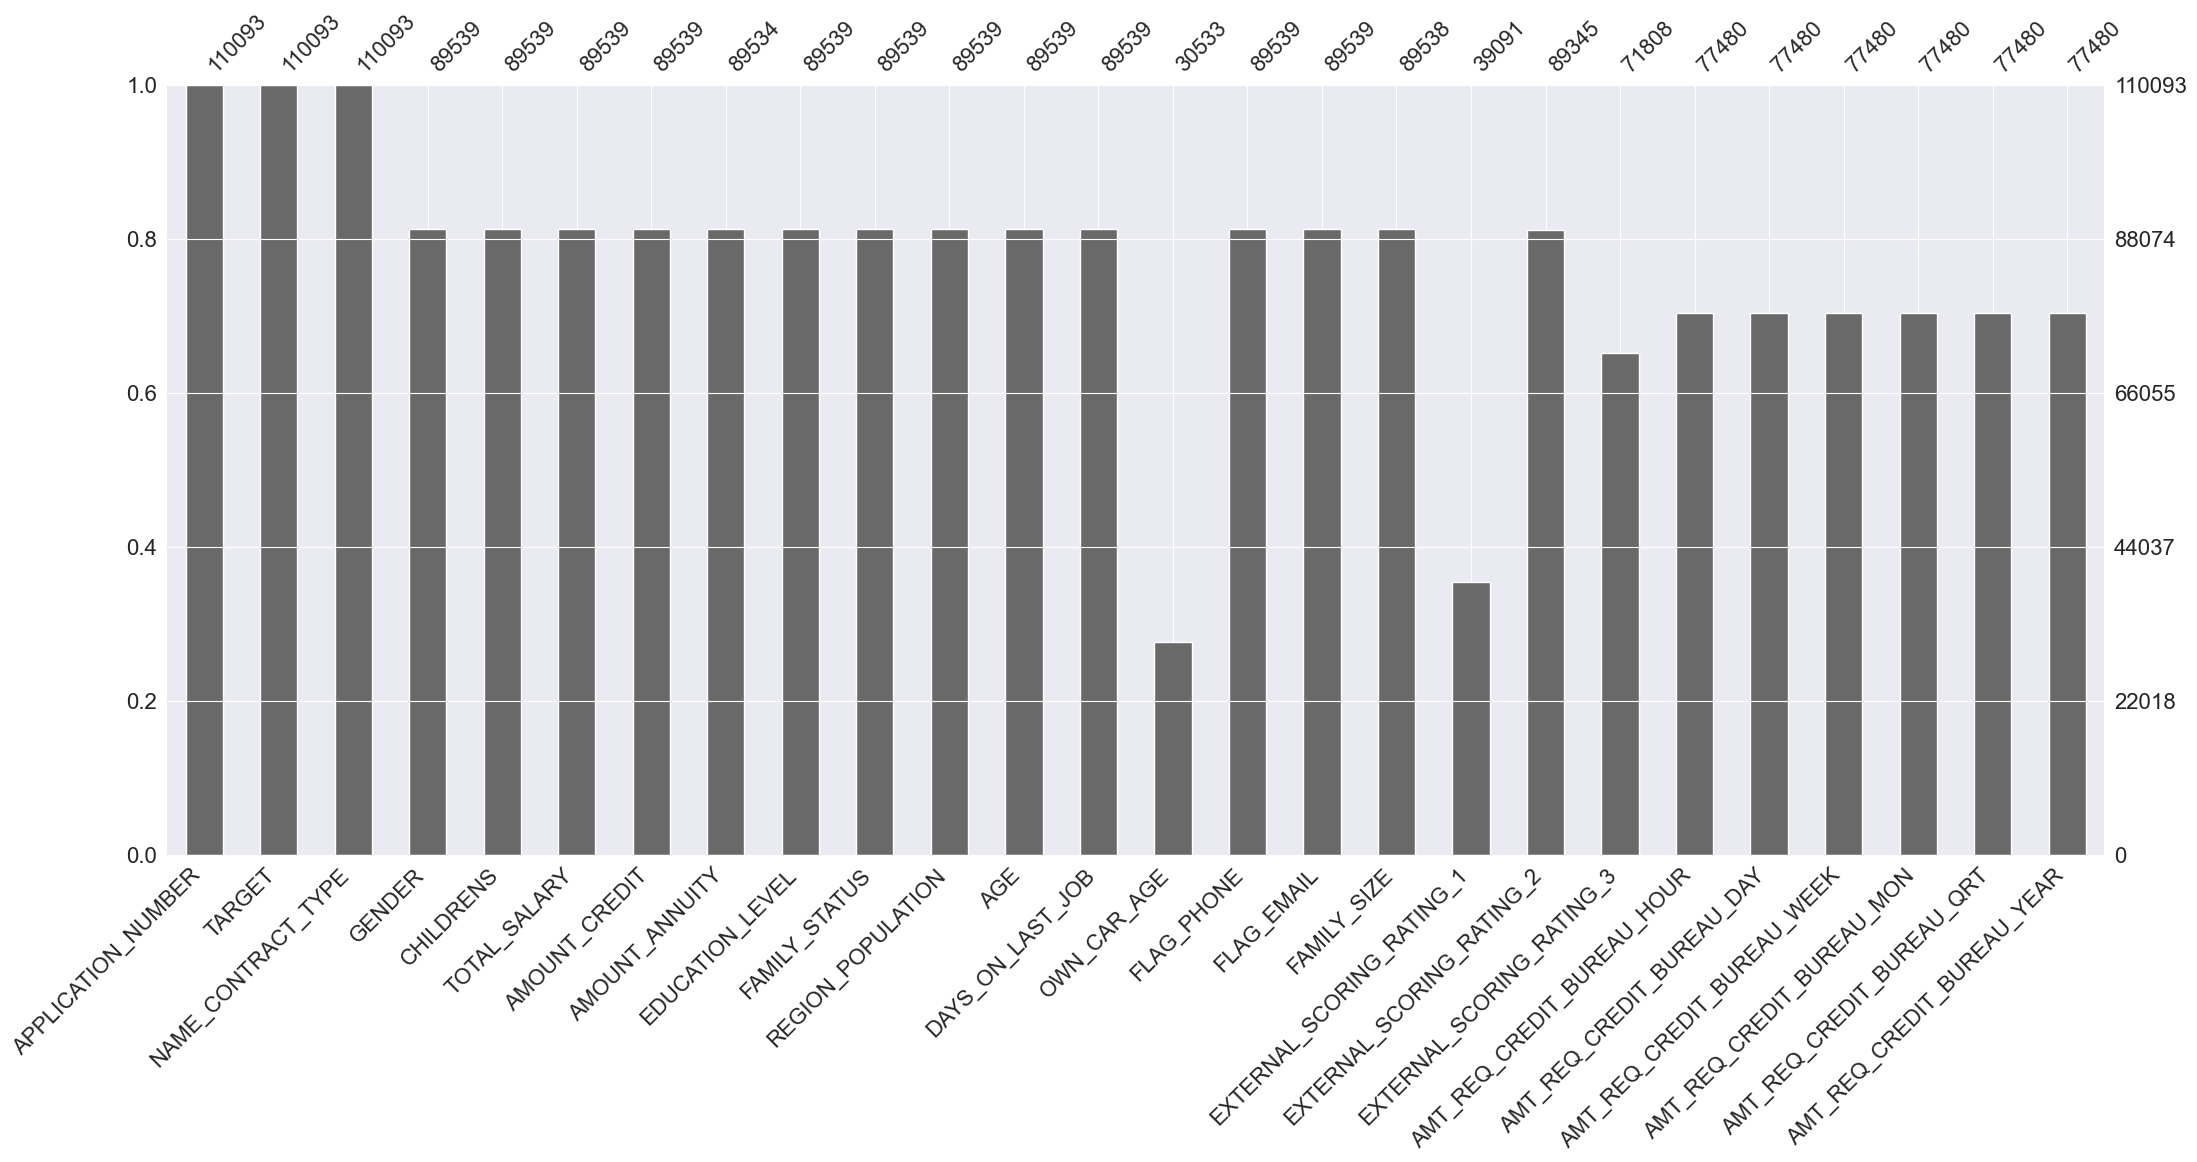

In [16]:
msno.bar(df_train)

### Initial Observations based on basic information:

1. **Data Merging**:
    - The Train/Test and Client Profile datasets can be effectively merged using the 'APPLICATION_NUMBER' column, resulting in a comprehensive dataset.


2. **Feature Composition**:
    - After merging the Train/Test and Client Profile datasets, a total of 26 features are available. Among these, 22 features are numeric, while 4 are categorical.


3. **Missing Profile Data**:
    - It's important to note that certain observations lack corresponding profile data, suggesting instances with missing information.


4. **Missing Data Concentration**:
    - 'OWN_CAR_AGE' and 'EXTERNAL_SCORING_RATING_1' exhibit substantial missing data, with both features containing more than 60% of missing values.


5. **Time Representations**:
    - 'AGE' and 'OWN_CAR_AGE' are both expressed in days, requiring conversion to years for more meaningful interpretation.


6. **Categorical Variability**:
    - Categorical columns showcase varying degrees of diversity, with the number of unique values ranging from 2 to 6 across different features.


7. **Target Imbalance**:
    - The target variable displays an imbalanced distribution, characterized by varying counts of positive and negative instances.


8. **Potential Categorical Features**:
    - Attributes like 'Childrens' and 'Family Size' possess characteristics that make them suitable candidates for categorical features.


9. **Outliers and 'Total Salary'**:
    - It's worth investigating the presence of outliers in the 'Total Salary' feature due to its potential impact on analysis and modeling.


10. **Normalization Consideration**:
    - Given the diversity in feature scales, normalization could be essential to ensure fair model training and comparison.


### Distributions

In [17]:
features = df_train.drop(columns=['TARGET'])
target = df_train['TARGET']
features.shape

(110093, 25)

#### Target Disctibution

In [18]:
target.value_counts(normalize=True)

TARGET
0   0.92
1   0.08
Name: proportion, dtype: float64

Text(0, 0.5, 'Index')

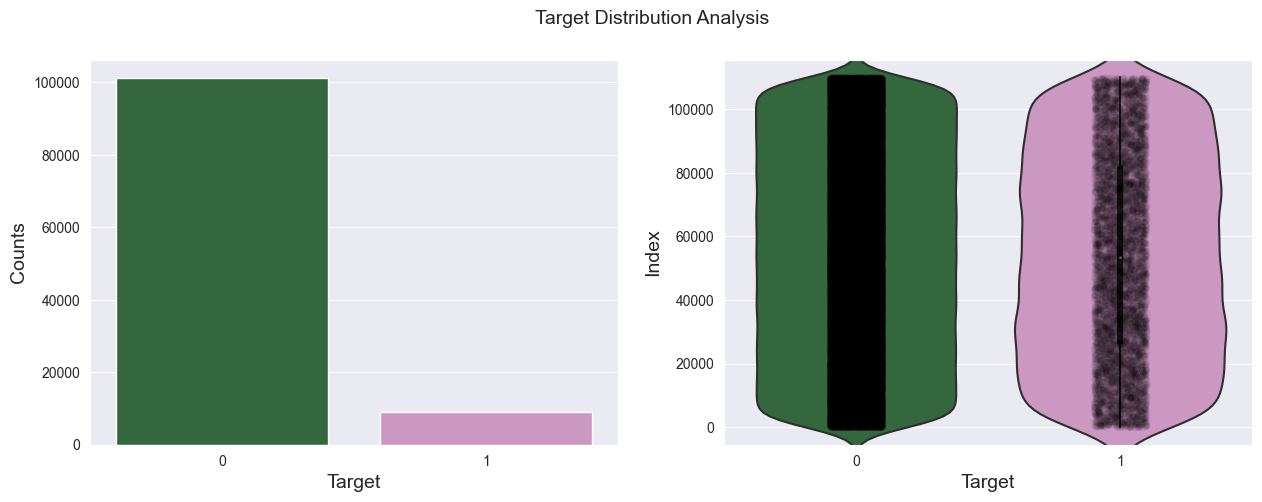

In [20]:
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plt.suptitle("Target Distribution Analysis", size=14)

sns.countplot(x=target, ax=axes[0], palette="cubehelix")
sns.violinplot(x=target, y=df_train.index, ax=axes[1], palette="cubehelix")
sns.stripplot(x=target, y=df_train.index, jitter=True, ax=axes[1], color="black", alpha=0.05)

axes[0].set_xlabel("Target", fontsize=14)
axes[0].set_ylabel("Counts", fontsize=14)
axes[1].set_xlabel("Target", fontsize=14)
axes[1].set_ylabel("Index", fontsize=14)

**Observation: Target Distribution**

- The imbalanced distribution of the target variable is as anticipated, aligning with the objective of identifying problematic clients.
- Despite the imbalanced nature of the target variable, its distribution among observations exhibits a normal pattern.


#### Features distribution

In [21]:
numerical_features = features.select_dtypes(include=[np.number])
print(f"count of numeric_features {numerical_features.shape[1]}")

numerical_features.columns

count of numeric_features 21


Index(['APPLICATION_NUMBER', 'CHILDRENS', 'TOTAL_SALARY', 'AMOUNT_CREDIT',
       'AMOUNT_ANNUITY', 'REGION_POPULATION', 'AGE', 'DAYS_ON_LAST_JOB',
       'OWN_CAR_AGE', 'FLAG_PHONE', 'FLAG_EMAIL', 'FAMILY_SIZE',
       'EXTERNAL_SCORING_RATING_1', 'EXTERNAL_SCORING_RATING_2',
       'EXTERNAL_SCORING_RATING_3', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [22]:
f_nunique = numerical_features.apply(lambda features: features.nunique(dropna=False))
f_nunique_col = f_nunique.index.tolist()
f_nunique

APPLICATION_NUMBER            110093
CHILDRENS                         14
TOTAL_SALARY                    1063
AMOUNT_CREDIT                   4018
AMOUNT_ANNUITY                 10543
REGION_POPULATION                 81
AGE                            16865
DAYS_ON_LAST_JOB                9553
OWN_CAR_AGE                       55
FLAG_PHONE                         3
FLAG_EMAIL                         3
FAMILY_SIZE                       16
EXTERNAL_SCORING_RATING_1      37239
EXTERNAL_SCORING_RATING_2      60877
EXTERNAL_SCORING_RATING_3        762
AMT_REQ_CREDIT_BUREAU_HOUR         5
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_MON         22
AMT_REQ_CREDIT_BUREAU_QRT         10
AMT_REQ_CREDIT_BUREAU_YEAR        22
dtype: int64

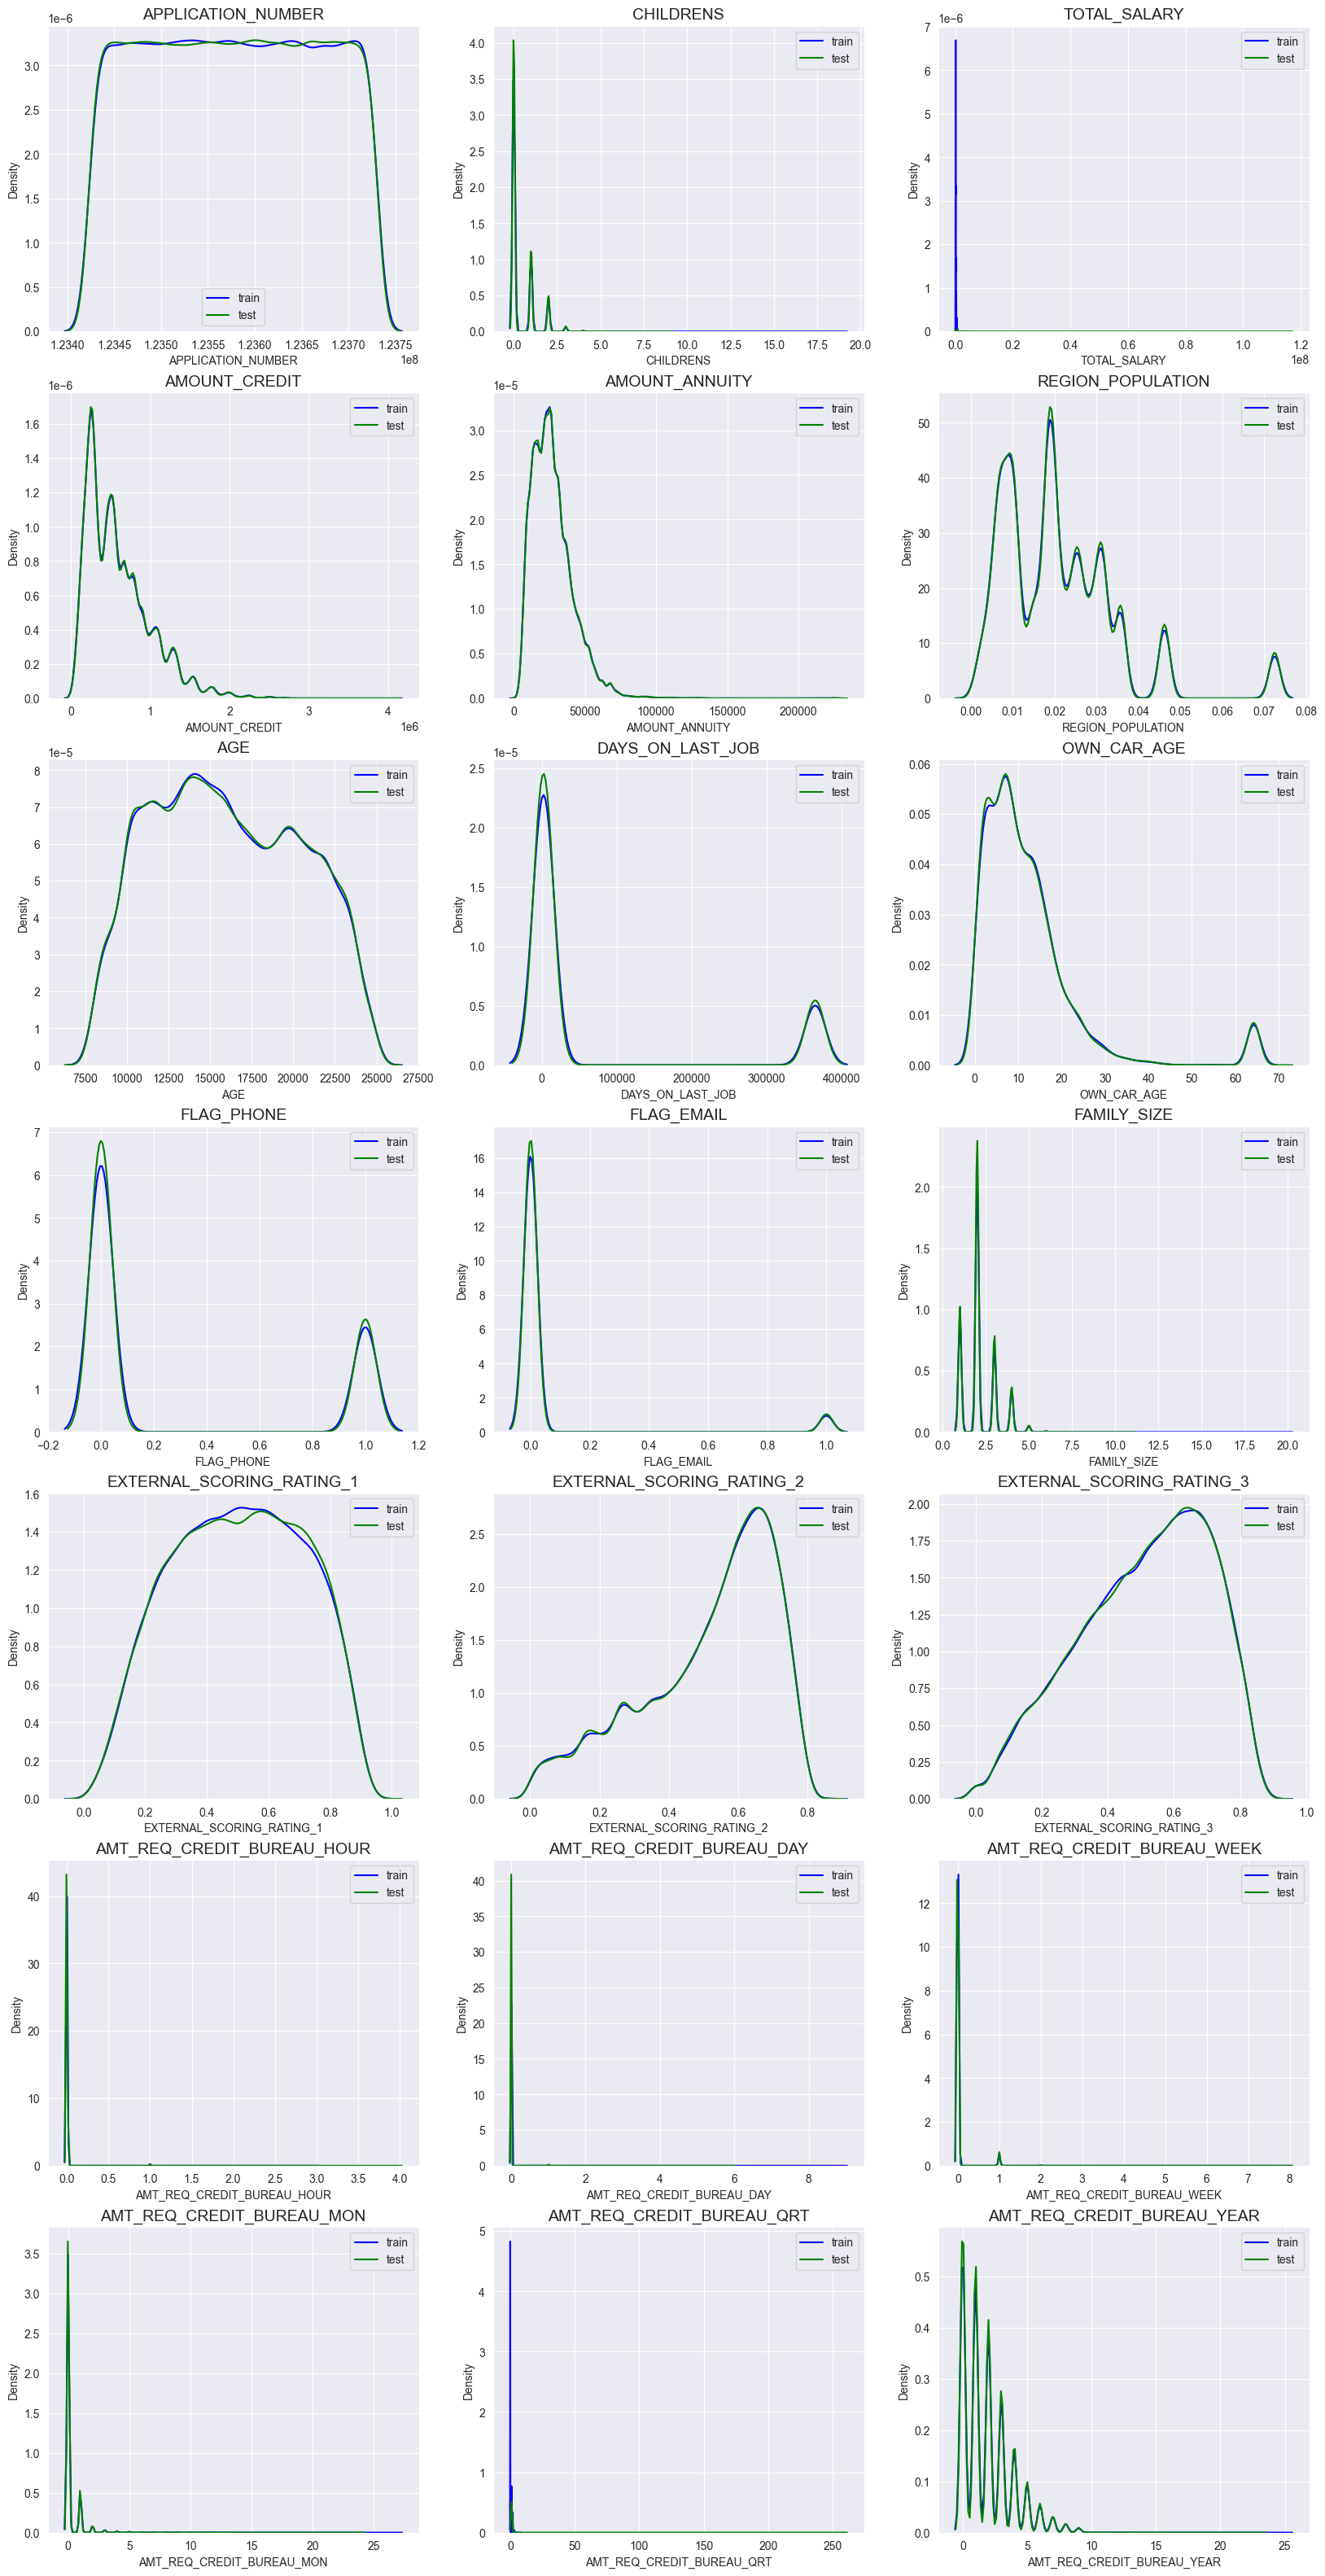

In [23]:
fig, axes = plt.subplots(7, 3, figsize=(20, 40))

for num, feature in enumerate(numerical_features.columns):
    try:
        train_data, test_data = df_train[feature].copy(), df_test[feature].copy()
        sns.kdeplot(train_data, ax=axes[num//3, num%3], color="blue", label="train")
        sns.kdeplot(test_data, ax=axes[num//3, num%3], color="green", label="test")
        axes[num//3, num%3].legend() 
    except RuntimeError:
        pass
    except KeyError:
        train_data = df_train[feature].copy()
        sns.kdeplot(train_data, ax=axes[num//3, num%3], color="blue", label="train")
    axes[num//3, num%3].set_title(feature, fontsize=14)

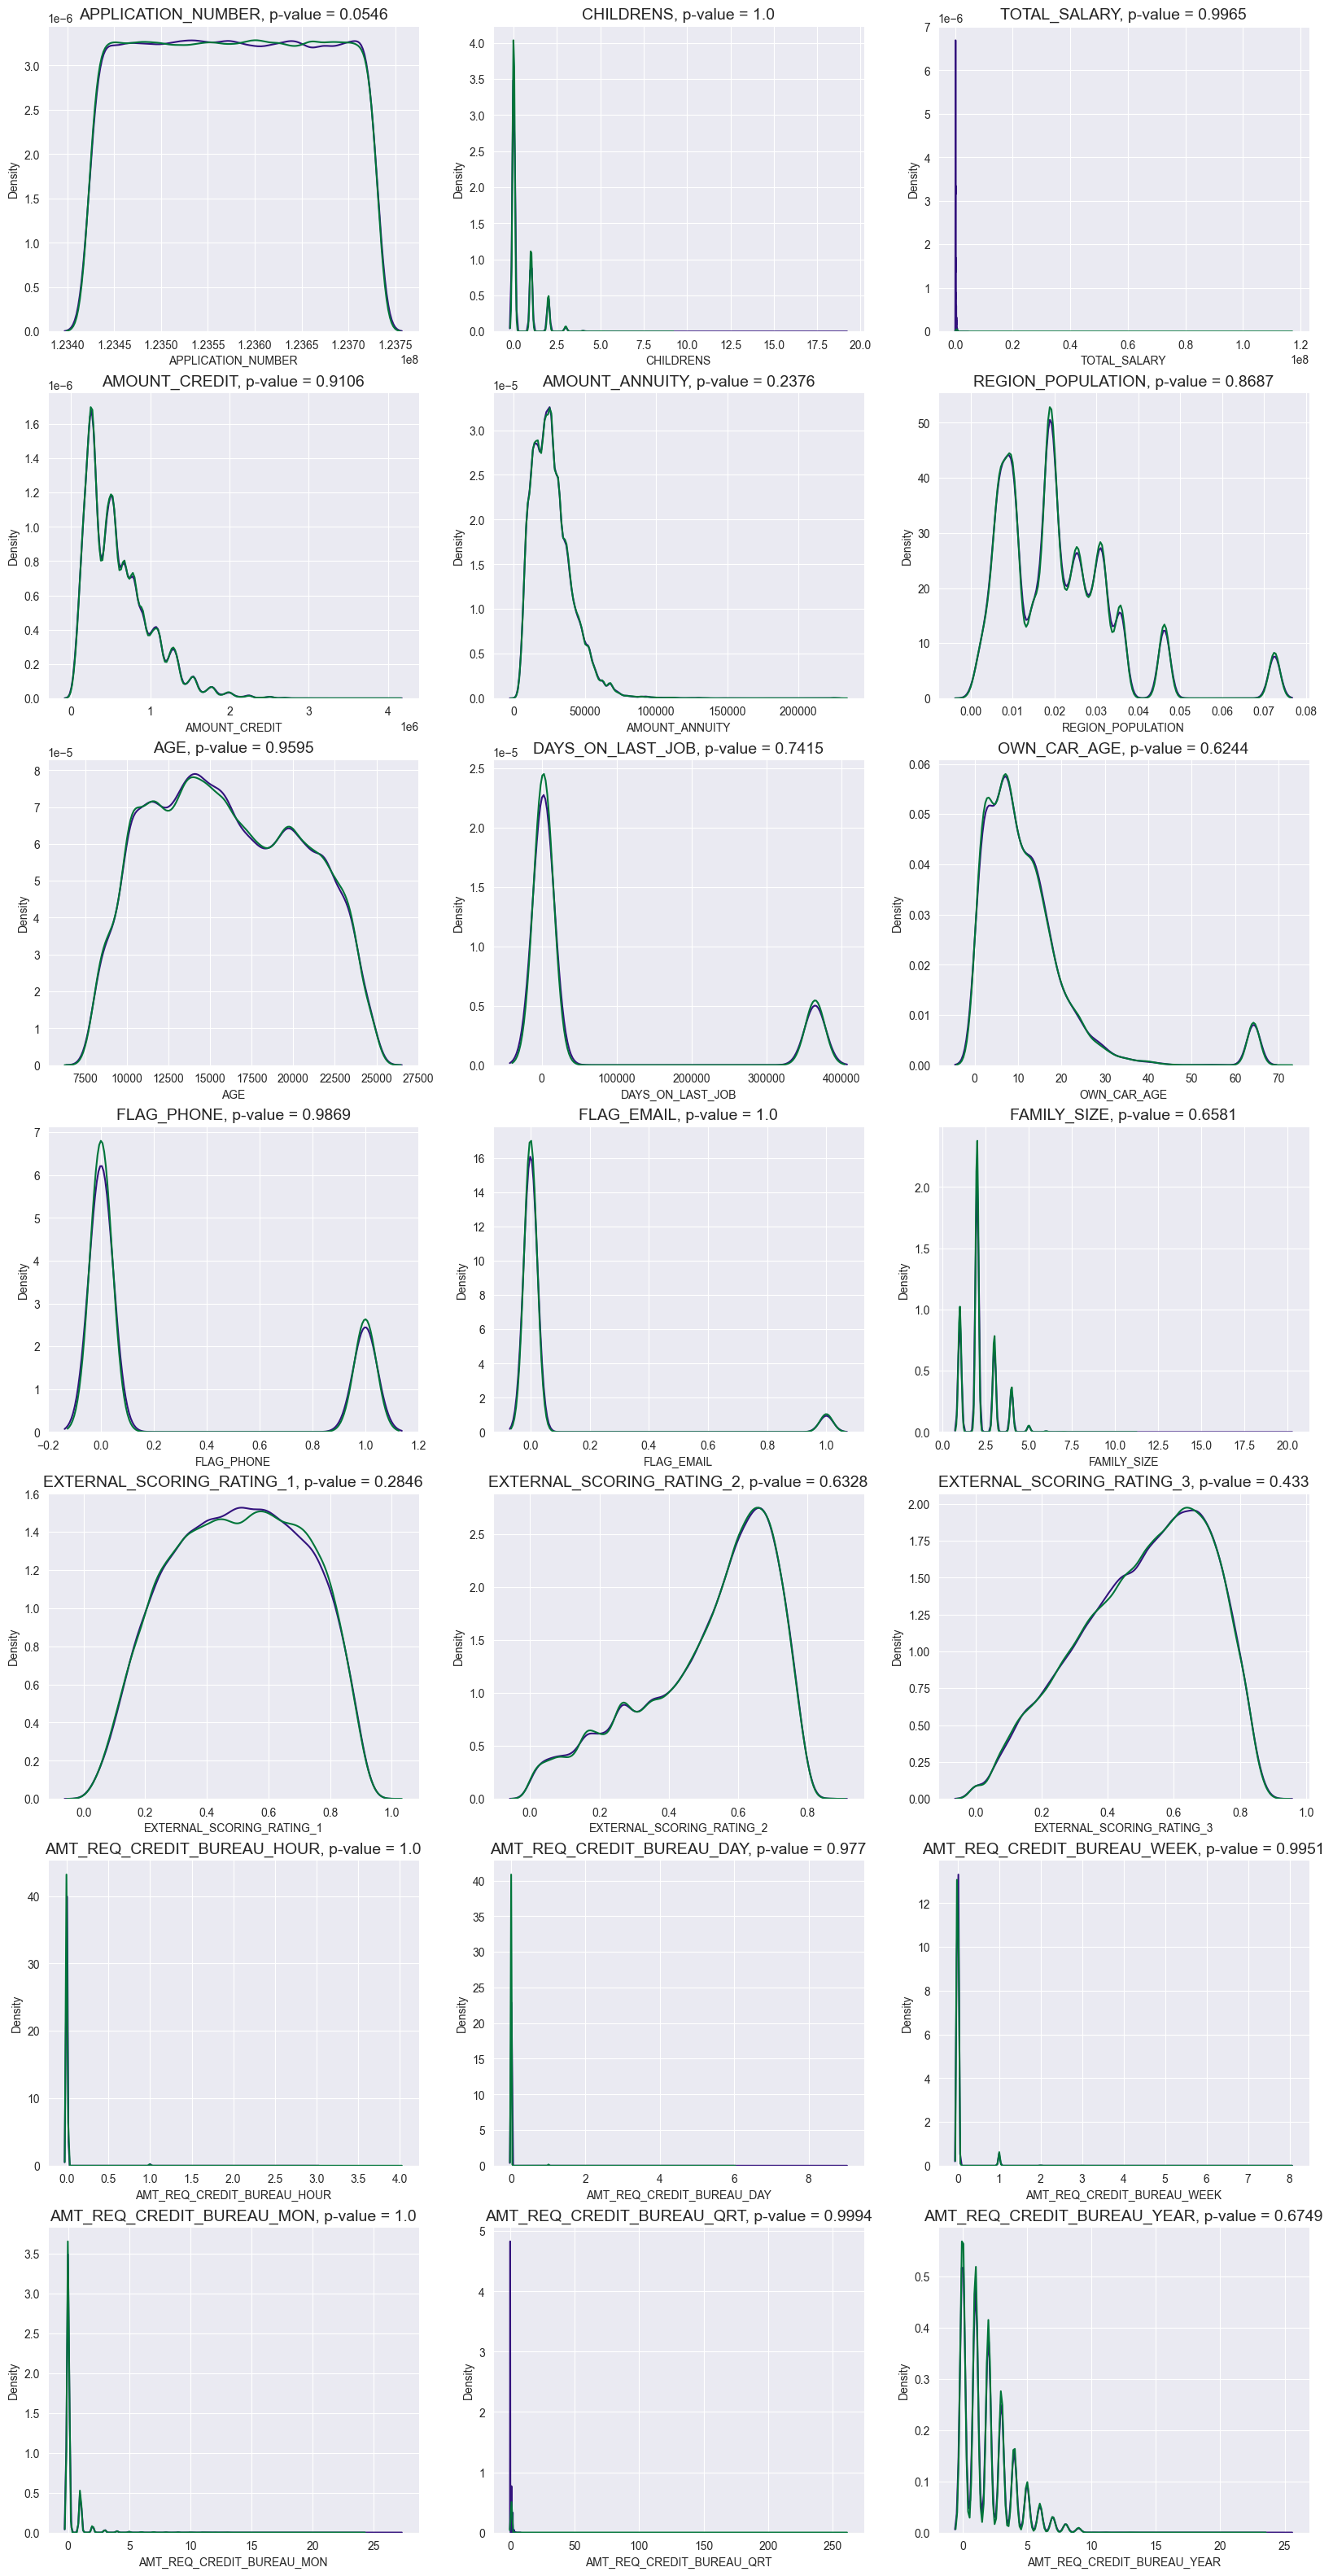

In [49]:
def plot_features_distribution(train: pd.DataFrame, test: pd.DataFrame, features: List[str]):
    """
    Построение графика распределения признака на обучающем и тестовом наборе данных.

    Parameters
    ----------
    train: pandas.core.frame.DataFrame
        Обучающая выборка.

    test: pandas.core.frame.DataFrame
        Тестовая выборка.

    features: List[str]
        Список с названеим признаков.

    """
    n_rows, n_cols = len(features)//3, 3
    if len(features) % 3:
        n_rows += 1

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 40))
    for num, feature in enumerate(features, start=1):
        plt.subplot(n_rows, n_cols, num)
        statistic, pvalue = ks_2samp(train[feature].sample(20000), test[feature].sample(20000))
        plt.title(f"{feature}, p-value = {round(pvalue, 4)}", size=14)
        sns.distplot(train[feature], hist=False, color="#33137d")
        sns.distplot(test[feature], color="#007539", hist=False)


def plot_features_target_distribution(train: pd.DataFrame, target: pd.Series, features: List[str]):
    """
    Построение графика распределения признака для
    разных значений целевой переменной.

    Parameters
    ----------
    train: pandas.core.frame.DataFrame
        Обучающая выборка.

    target: pandas.core.frame.Series
        Вектор целевой переменной.

    features: List[str]
        Список с названеим признаков.

    """
    n_rows, n_cols = len(features)//3, 3
    if len(features) % 3:
        n_rows += 1

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 40))
    for num, feature in enumerate(features, start=1):
        plt.subplot(n_rows, n_cols, num)
        positive_mask, negative_mask = target == 1, target == 0
        statistic, pvalue = ks_2samp(
            train.loc[positive_mask, feature].sample(20000),
            test.loc[negative_mask, feature].sample(20000)
        )
        plt.title(f"{feature}, p-value = {round(pvalue, 4)}", size=14)
        sns.distplot(train.loc[positive_mask, feature], hist=False, color="#33137d")
        sns.distplot(test.loc[negative_mask, feature], color="#007539", hist=False)
        
plot_features_distribution(df_train, df_test, features=numerical_features.columns)

**Observations: numeric features**:
- We have 21 features which are numeric
- We have 10 numeric features with values less than 25 which can be treated as categorical/discrete features
- Test and Train have similar distribution for most of the features which is a good sign for a future prediction. Althouh there is a differencein dencity and feature variance for some features like TOTAL_SALARY, AMT_REQ_CREDIT_BUREAU_QRT, CHILDRENS, p-value is more than 0.05 for all of the features which mean that there is no significant difference in distribution

##### Descrete features

In [25]:
discrete_f_col = f_nunique[f_nunique<=25].index
print(f'Descrete features (25 or less unique values) :')
print(f'Count: {len(discrete_f_col)}')
print(f'List: {discrete_f_col}')

Descrete features (25 or less unique values) :
Count: 10
List: Index(['CHILDRENS', 'FLAG_PHONE', 'FLAG_EMAIL', 'FAMILY_SIZE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')


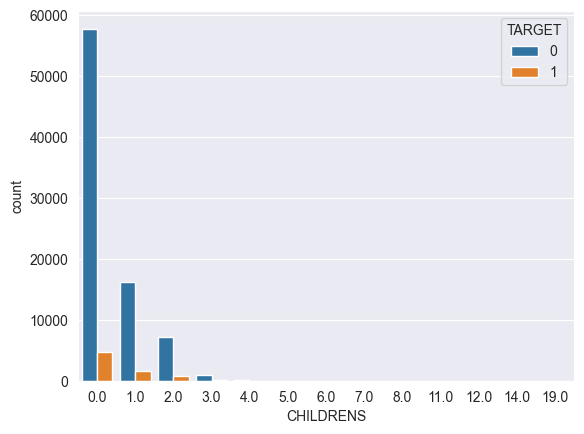

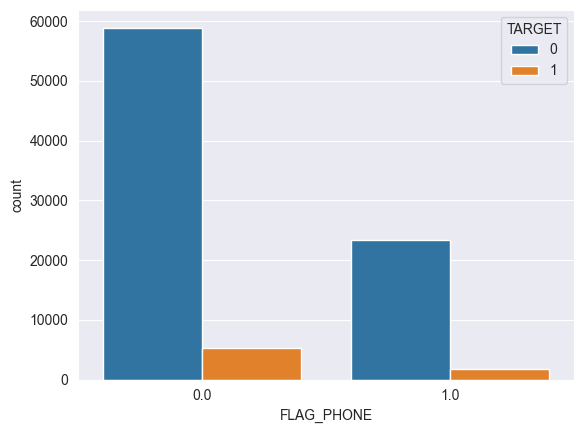

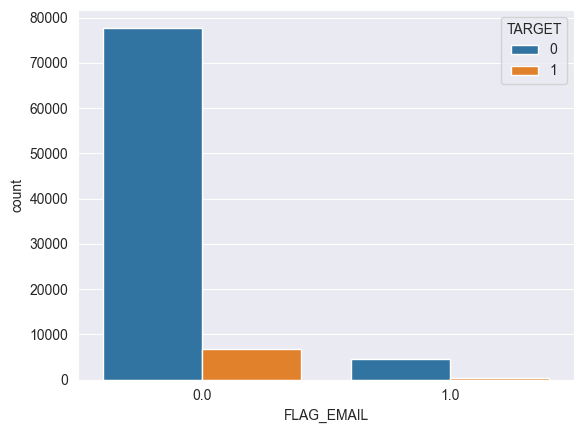

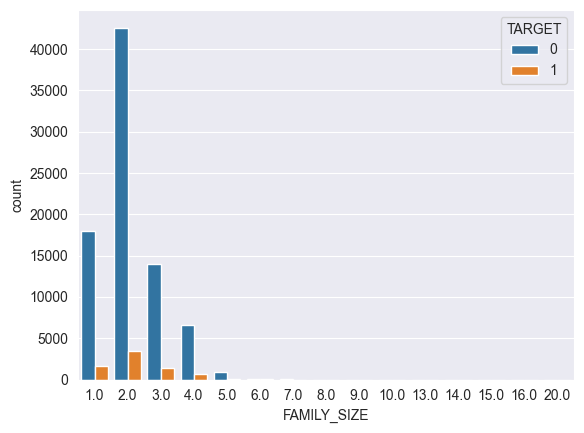

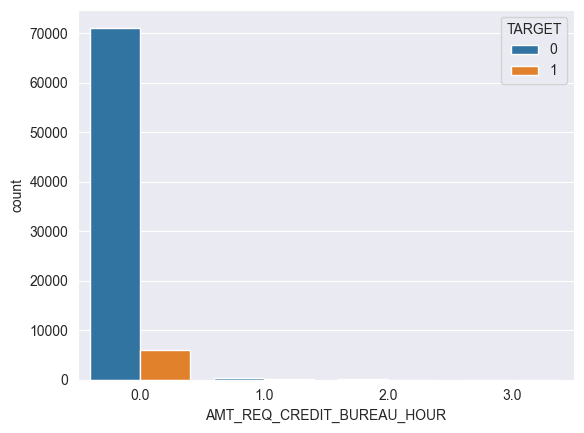

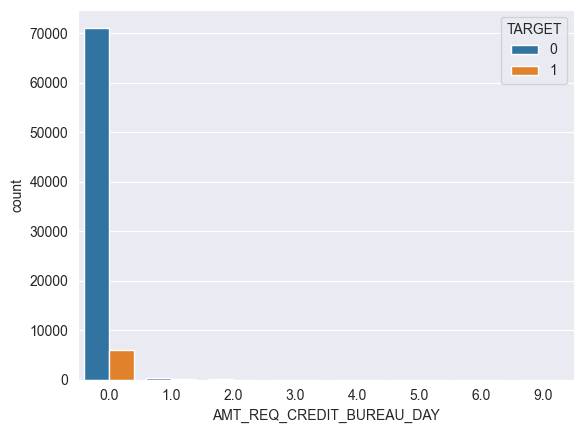

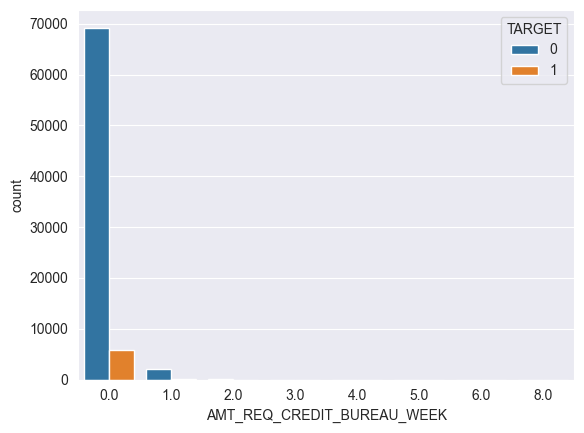

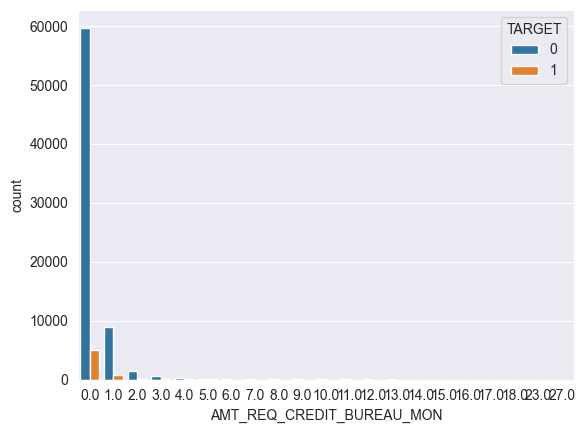

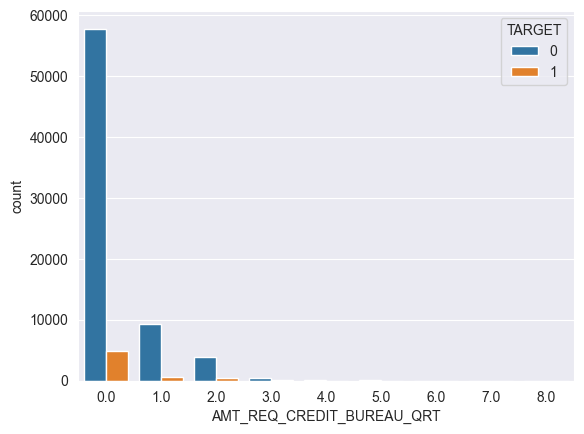

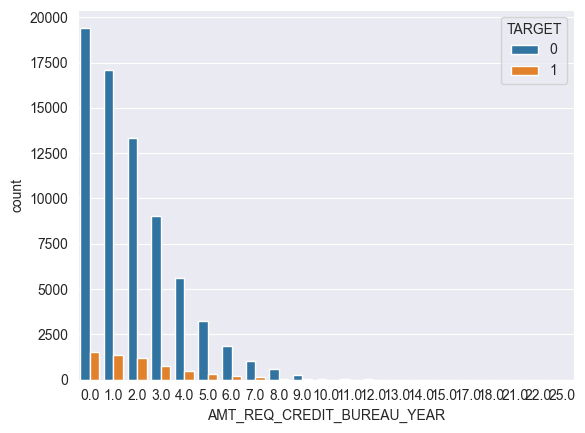

In [26]:
for feature in discrete_f_col:
    sns.countplot(x =feature, hue = "TARGET", data = df_train)
    plt.show()

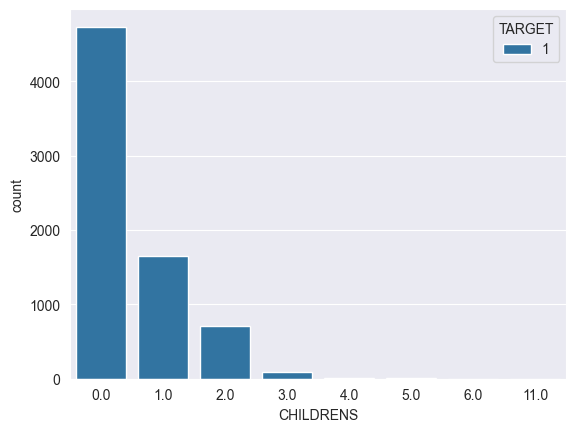

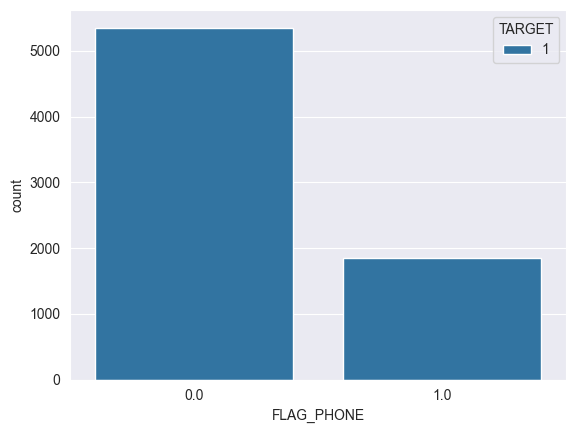

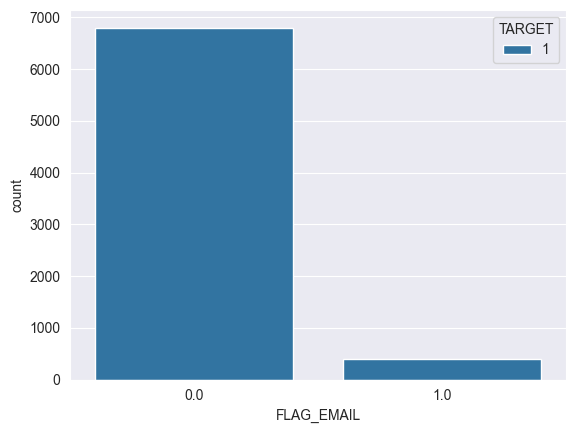

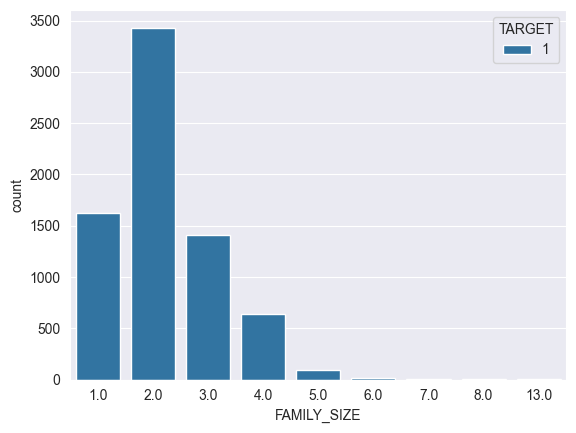

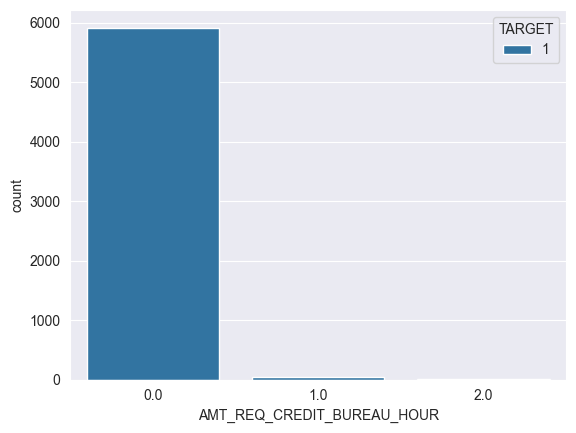

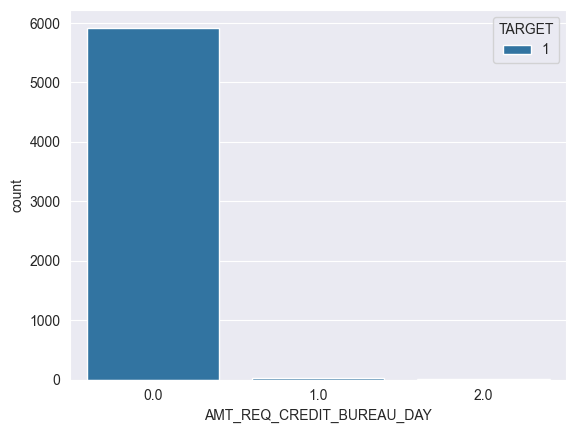

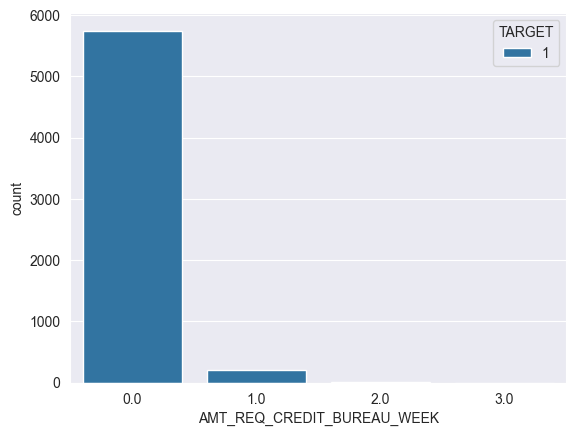

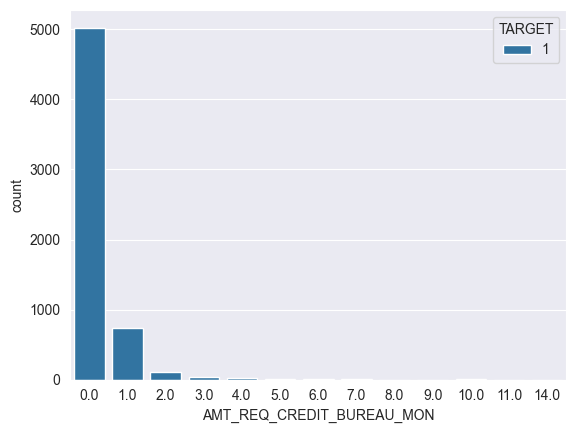

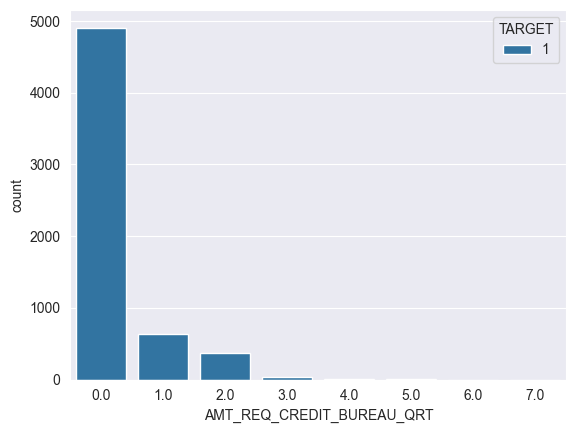

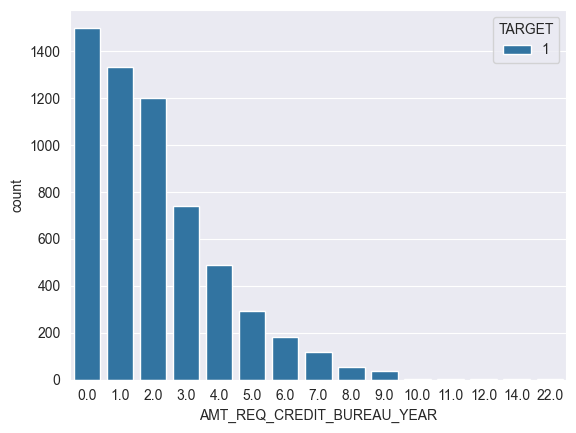

In [27]:
for feature in discrete_f_col:
    sns.countplot(x =feature, hue = "TARGET", data = df_train[df_train['TARGET']==1])
    plt.show()

**Observations: descrete features**:
- CHILDRENS feature have some sparsed values after 5 and can be combined
- FAMILY_SIZE feature have some sparsed values after 7 and can be combined
- AMT_REQ_CREDIT_BUREAU_HOUR feature have some sparsed values after 2 and can be combined
- AMT_REQ_CREDIT_BUREAU_DAY feature have some sparsed values after 2 and can be combined
- AMT_REQ_CREDIT_BUREAU_WEEK feature have some sparsed values after 2 and can be combined
- AMT_REQ_CREDIT_BUREAU_MON feature have some sparsed values after 6 and can be combined
- AMT_REQ_CREDIT_BUREAU_QRT feature have some sparsed values after 5 and can be combined
- AMT_REQ_CREDIT_BUREAU_YEAR feature have some sparsed values after 10 and can be combined

##### Continuous Feature

In [28]:
continuous_f_col = f_nunique[f_nunique>25].index
print(f'Continuous features (more than 25 unique values) :')
print(f'Count: {len(continuous_f_col)}')
print(f'List: {continuous_f_col}')

Continuous features (more than 25 unique values) :
Count: 11
List: Index(['APPLICATION_NUMBER', 'TOTAL_SALARY', 'AMOUNT_CREDIT', 'AMOUNT_ANNUITY',
       'REGION_POPULATION', 'AGE', 'DAYS_ON_LAST_JOB', 'OWN_CAR_AGE',
       'EXTERNAL_SCORING_RATING_1', 'EXTERNAL_SCORING_RATING_2',
       'EXTERNAL_SCORING_RATING_3'],
      dtype='object')


In [29]:
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings("ignore")

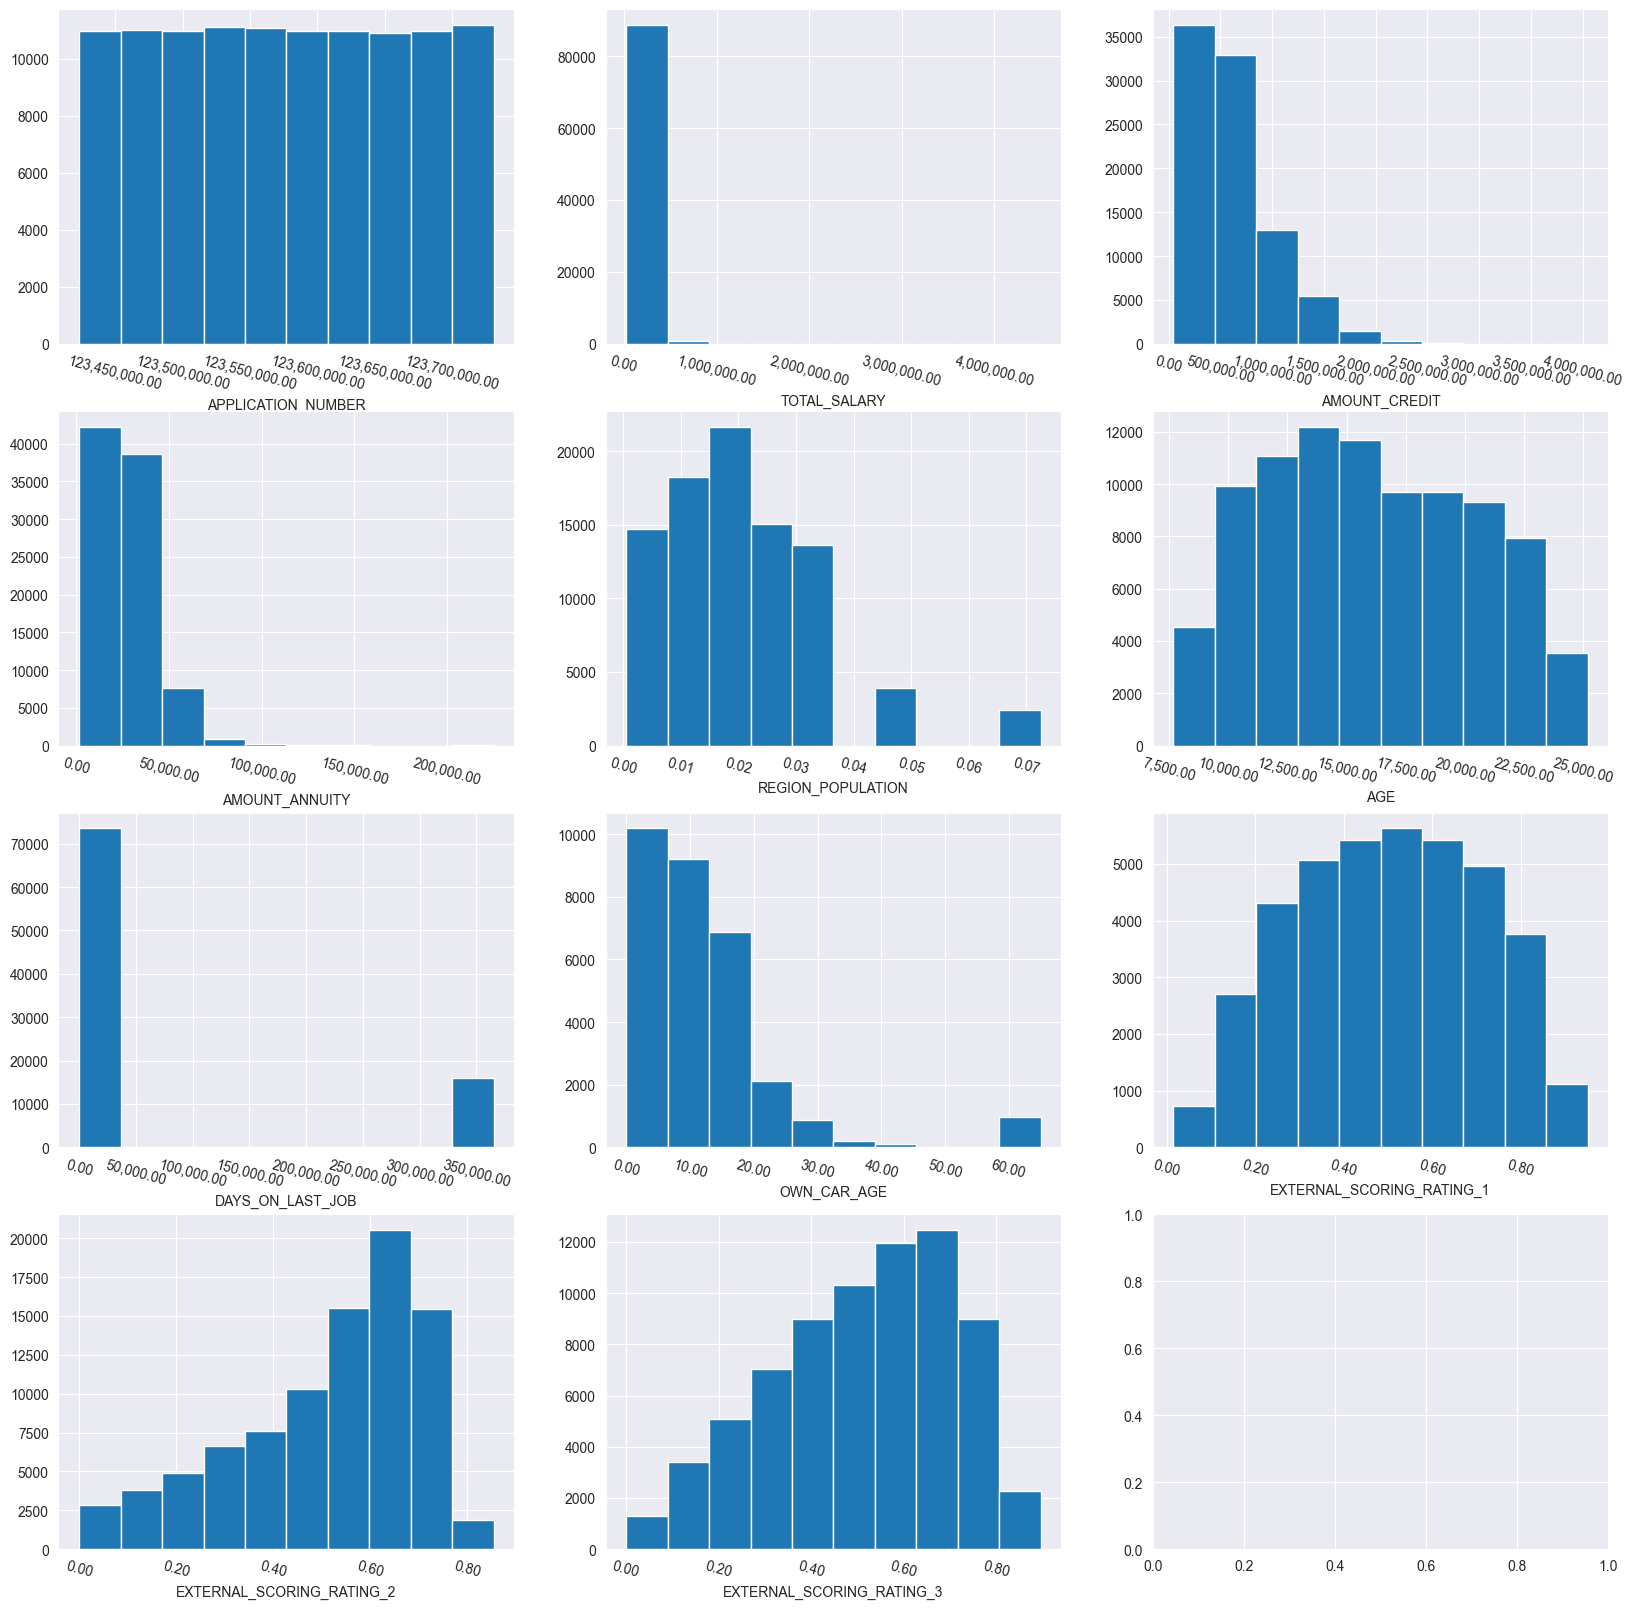

In [30]:
fig, axes = plt.subplots(4, 3, figsize=(20, 20))

for num, feature in enumerate(continuous_f_col):
    data = df_train[feature].copy()
    axes[num//3, num%3].hist(data, bins=10)
    axes[num//3, num%3].set_xticklabels( axes[num//3, num%3].get_xticks(), rotation = -15)
    axes[num//3, num%3].set_xlabel(feature, fontsize=10)
    axes[num//3, num%3].xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

**Observations: Continuous features**:
- We have 11 Continuous features
- DAYS_ON_LAST_JOB have a strange value 350000 which is more than 950 years, might be used as a value for a missing data
- TOTAL_SALARY might have some potential outliers as most of the data is 1000000 or less
- AMOUNT_CREDIT might have some potential outliers as most of the data is 3000000 or less
- AMOUNT_ANNUITY might have some potential outliers as most of the data is 100000 or less

##### Features correlation

Text(0, 0.5, 'Density')

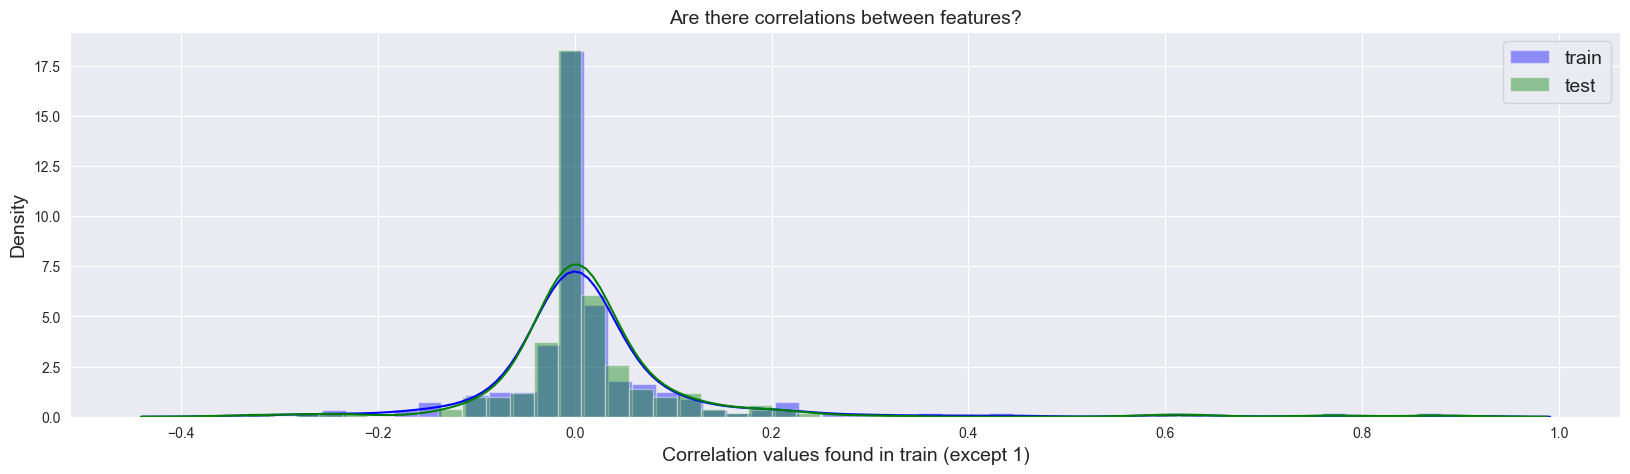

In [37]:
train_correlations = df_train.select_dtypes(include=[np.number]).corr()
train_correlations = train_correlations.values.flatten()
train_correlations = train_correlations[train_correlations != 1]

columns = df_train.columns.tolist()
columns.remove("TARGET")

test_correlations = df_test.select_dtypes(include=[np.number]).corr()
test_correlations = test_correlations.values.flatten()
test_correlations = test_correlations[test_correlations != 1]

plt.figure(figsize=(20,5))
sns.distplot(train_correlations, color="Blue", label="train")
sns.distplot(test_correlations, color="Green", label="test")

plt.xlabel("Correlation values found in train (except 1)", size=14)
plt.title("Are there correlations between features?", size=14)
plt.legend(loc="best", fontsize=14)
plt.ylabel("Density", size=14)

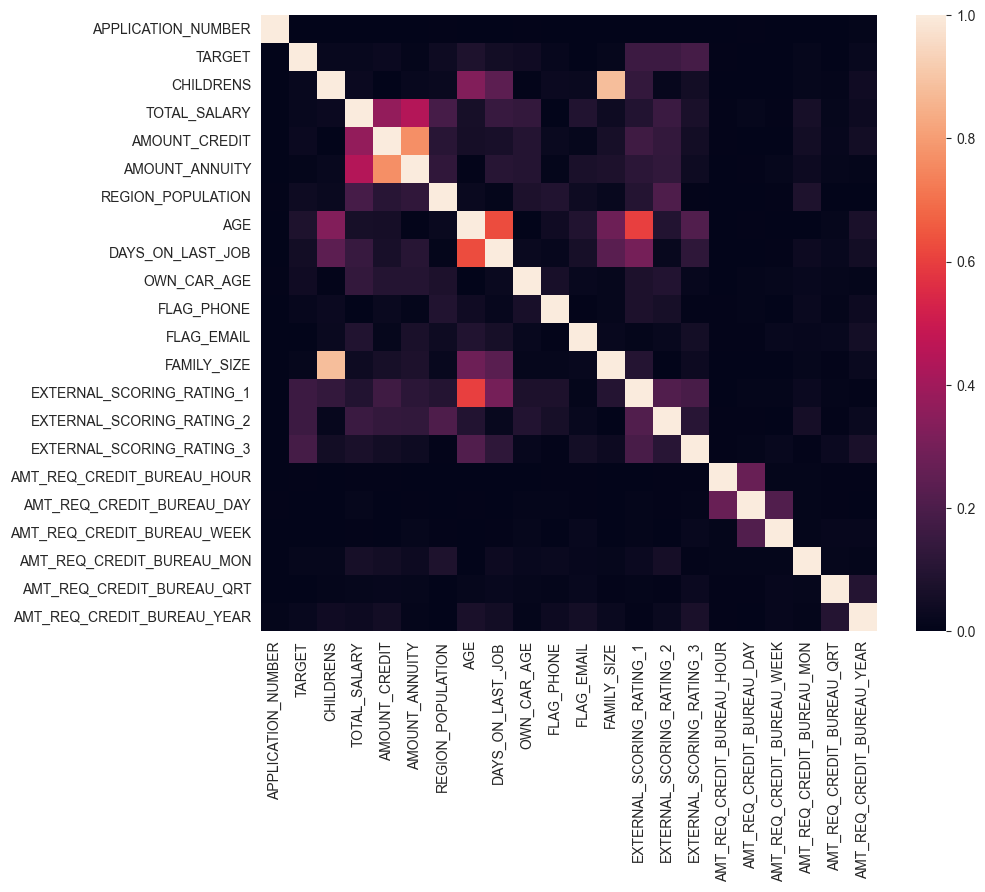

In [44]:
#correlation matrix
corr_matrix = df_train.select_dtypes(include=[np.number]).corr().abs().round(3)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, square=True);

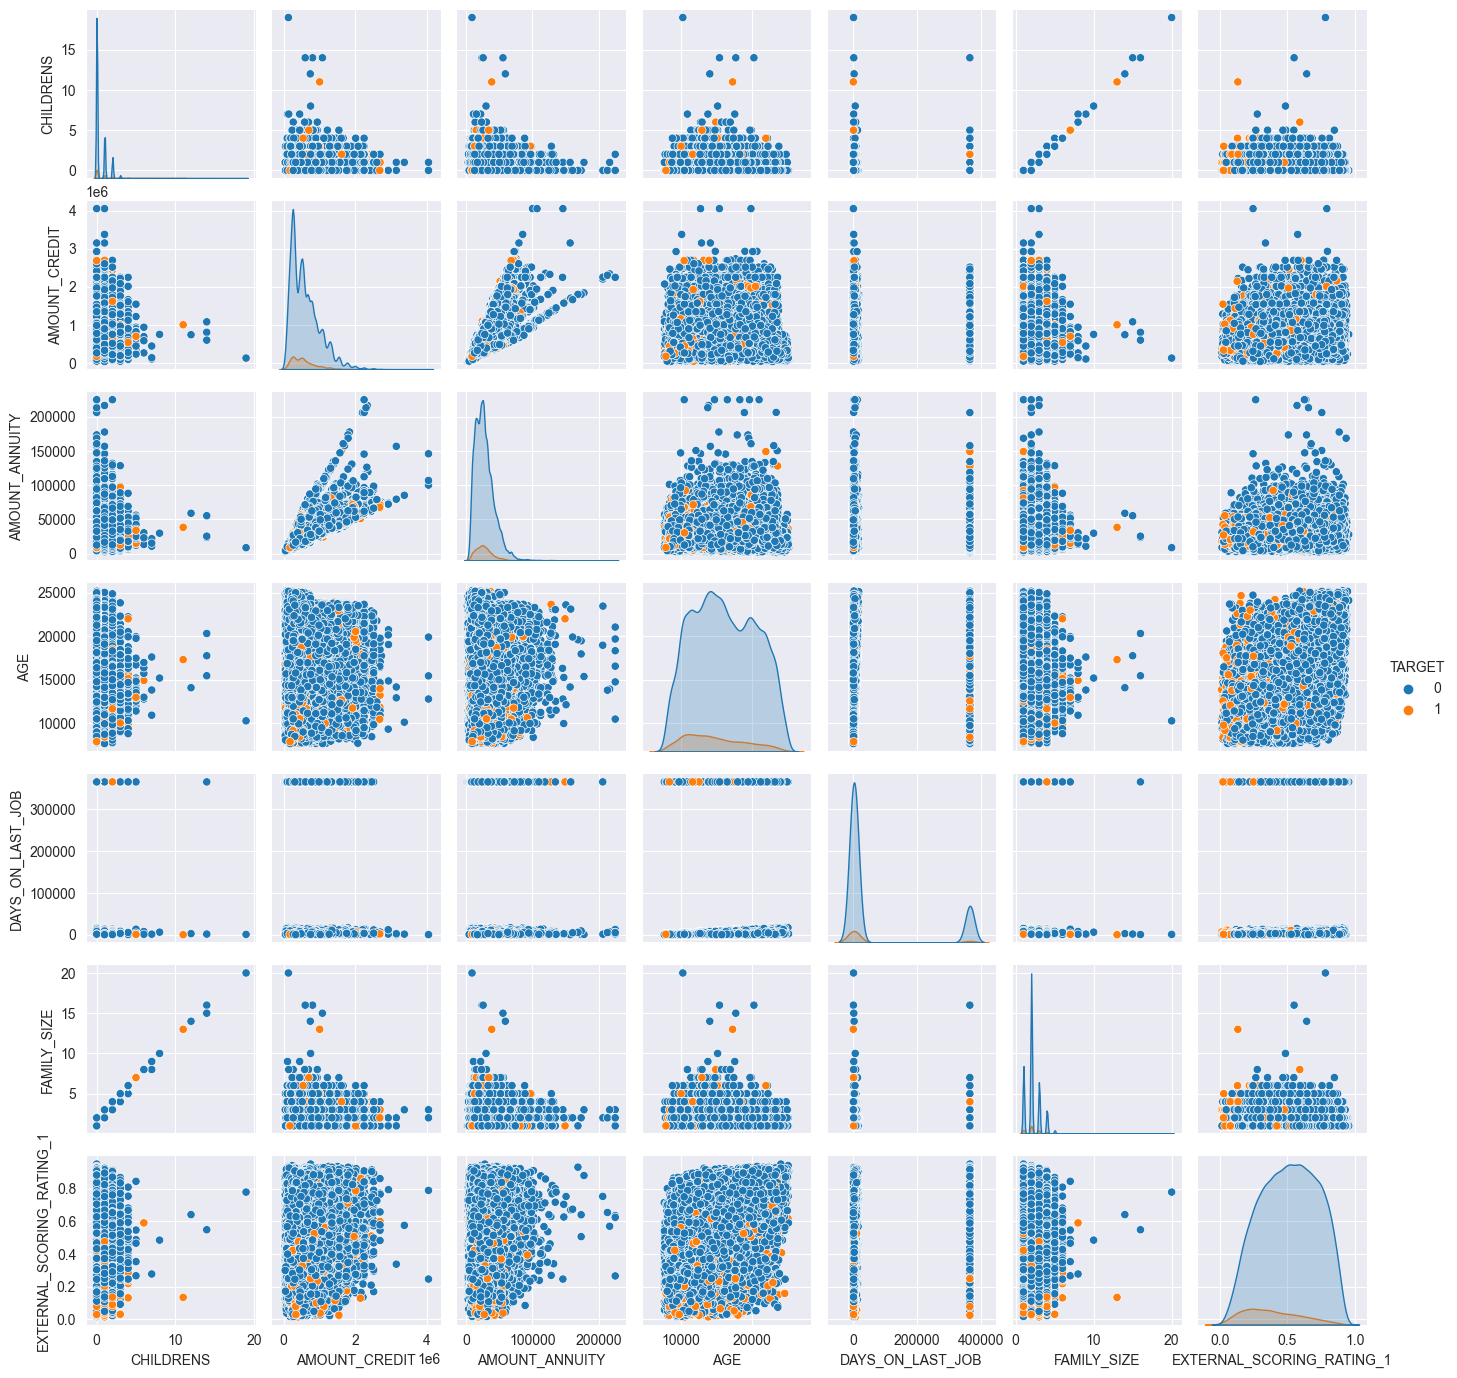

In [43]:
columns = ['CHILDRENS', 'AMOUNT_CREDIT','AMOUNT_ANNUITY', 'AGE', 'DAYS_ON_LAST_JOB','FAMILY_SIZE', 'EXTERNAL_SCORING_RATING_1', 'TARGET']
sns.pairplot(df_train[columns], hue = 'TARGET', size=2, kind="scatter", diag_kind="kde")

In [45]:
corr_with_target = corr_matrix["TARGET"].sort_values(ascending = False)
corr_with_target

TARGET                       1.00
EXTERNAL_SCORING_RATING_3    0.18
EXTERNAL_SCORING_RATING_2    0.16
EXTERNAL_SCORING_RATING_1    0.16
AGE                          0.08
DAYS_ON_LAST_JOB             0.05
OWN_CAR_AGE                  0.04
REGION_POPULATION            0.04
AMOUNT_CREDIT                0.03
CHILDRENS                    0.02
TOTAL_SALARY                 0.02
AMT_REQ_CREDIT_BUREAU_YEAR   0.02
FLAG_PHONE                   0.02
FAMILY_SIZE                  0.01
AMT_REQ_CREDIT_BUREAU_MON    0.01
AMOUNT_ANNUITY               0.01
AMT_REQ_CREDIT_BUREAU_HOUR   0.00
AMT_REQ_CREDIT_BUREAU_QRT    0.00
APPLICATION_NUMBER           0.00
AMT_REQ_CREDIT_BUREAU_WEEK   0.00
AMT_REQ_CREDIT_BUREAU_DAY    0.00
FLAG_EMAIL                   0.00
Name: TARGET, dtype: float64

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
%%time
parameters = {"max_depth": 6, "n_estimators": 25, "random_state": 27, "n_jobs": 2}

forest = RandomForestClassifier(**parameters)
forest.fit(numerical_features.fillna(-9999), target)

CPU times: user 1.45 s, sys: 40.5 ms, total: 1.49 s
Wall time: 788 ms


RandomForestClassifier(max_depth=6, n_estimators=25, n_jobs=2, random_state=27)

Text(0.5, 1.0, 'What are the top important features to start with?')

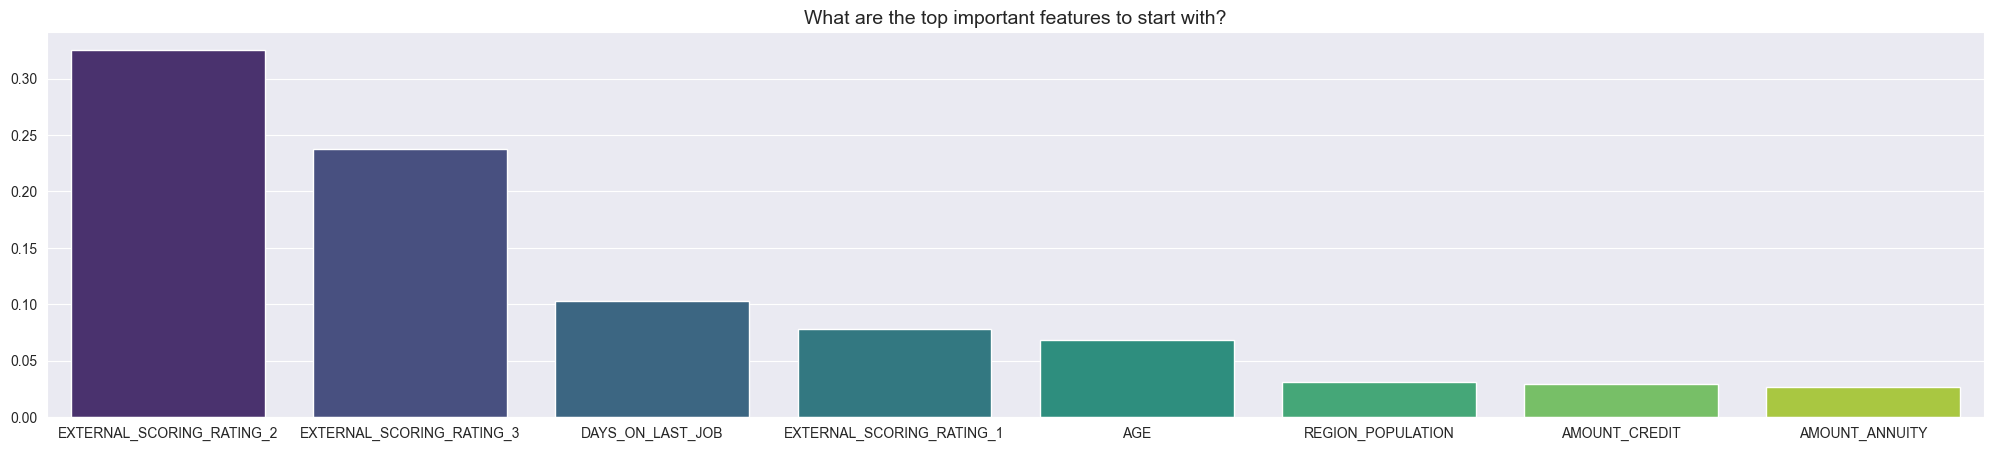

In [48]:
n_top = 8
importances = forest.feature_importances_
idx = np.argsort(importances)[::-1][0:n_top]
feature_names = numerical_features.columns

plt.figure(figsize=(25, 5))
sns.barplot(x=feature_names[idx], y=importances[idx], palette="viridis")
plt.title("What are the top important features to start with?", size=14)

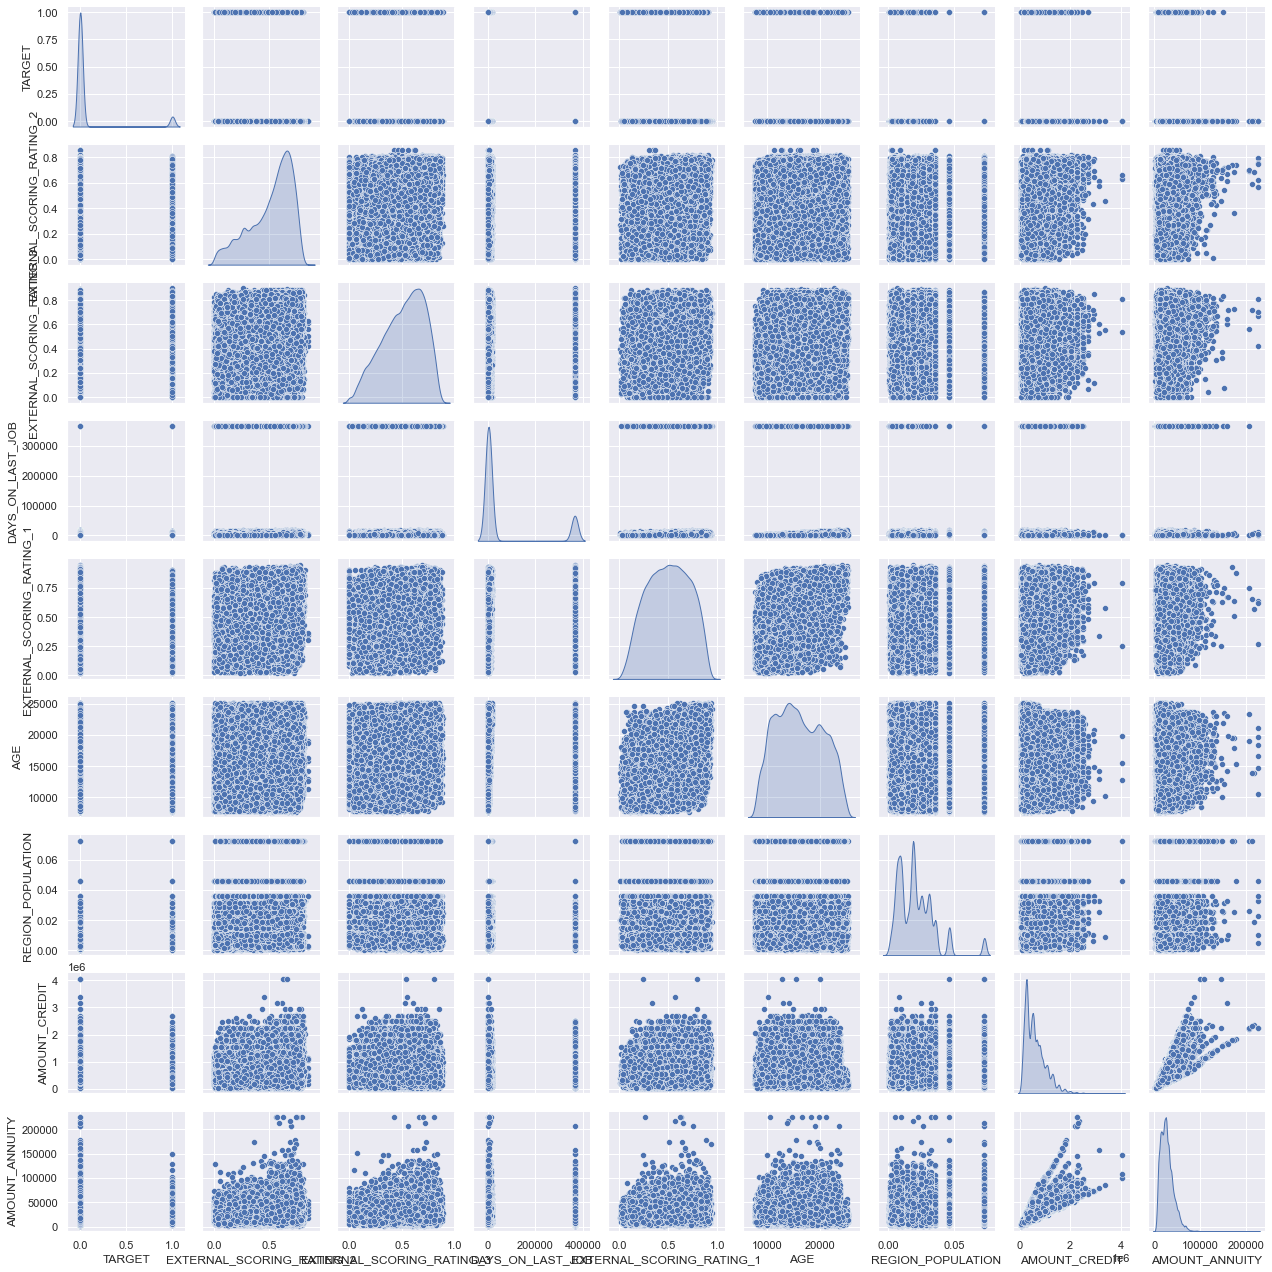

In [77]:
sns.set()
columns = [
    "TARGET",
    "EXTERNAL_SCORING_RATING_2",
    "EXTERNAL_SCORING_RATING_3",
    "DAYS_ON_LAST_JOB",
    "EXTERNAL_SCORING_RATING_1",
    "AGE",
    "REGION_POPULATION",
    "AMOUNT_CREDIT",
    "AMOUNT_ANNUITY"
]

sns.pairplot(df_train[columns], size=2, kind="scatter", diag_kind="kde")
plt.show()

**Observations: Correlation**:
- It seems like most of the features are not very correlated with each other, linear algorithm might be not the best option
- TARGET features doesn't correlate a lot with other features either
- CHILDRENS and FAMILY_SIZE, AMOUNT_CREDIT and AMOUNT_ANNUITY, AGE and DAYS_ON_LAST_JOB have a hign correlation
- EXTERNAL_SCORING_RATING_2, EXTERNAL_SCORING_RATING_3 and DAYS_ON_LAST_JOB are the top 3 important features

## Distribution and Correlation Overall Observations

### Target Distribution
- The target variable's distribution is imbalanced, as expected, aligning with the goal of identifying problematic clients.
- Despite the imbalanced nature of the target variable, its distribution among observations follows a normal pattern.

### Feature Distribution
- There are 21 numeric features in the dataset.
- Among the numeric features, there are 10 with values less than 25, which might be treated as categorical or discrete features.
- The distributions of most features are similar between the test and train datasets, which bodes well for future predictions.
- Some features such as TOTAL_SALARY, AMT_REQ_CREDIT_BUREAU_QRT, and CHILDRENS show differences in density and feature variance between test and train data. However, p-value is more than 0.05 for all of the features which mean that there is no significant difference in distribution.

### Discrete Features
- The CHILDRENS feature has sparse values after 5 and could potentially be grouped together.
- The FAMILY_SIZE feature exhibits sparse values after 7 and might benefit from grouping.
- Similarly, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, and AMT_REQ_CREDIT_BUREAU_YEAR show sparse values after certain points and could be combined accordingly.

### Continuous Features
- There are 11 continuous features in the dataset.
- The DAYS_ON_LAST_JOB feature contains an anomalous value of 350000, which is equivalent to more than 950 years. This value might indicate missing data.
- The TOTAL_SALARY feature could have potential outliers, as the majority of data points are 1000000 or less.
- Both AMOUNT_CREDIT and AMOUNT_ANNUITY features show signs of potential outliers, given that most data points are 3000000 or less for AMOUNT_CREDIT and 100000 or less for AMOUNT_ANNUITY.

### Features Correlation
- Many features appear to have low correlation with each other, suggesting that linear algorithms might not be the best fit for modeling.
- The target variable doesn't exhibit strong correlations with other features either.
- Notably, CHILDRENS and FAMILY_SIZE, AMOUNT_CREDIT and AMOUNT_ANNUITY, and AGE and DAYS_ON_LAST_JOB show higher correlations.
- Among the features, EXTERNAL_SCORING_RATING_2, EXTERNAL_SCORING_RATING_3, and DAYS_ON_LAST_JOB emerge as the top three important features, possibly indicating their predictive significance.


## Baseline

In [51]:
features = df_train.drop(columns=['TARGET'])
target = df_train['TARGET']
numerical_features = features.select_dtypes(include=[np.number])

In [52]:
X_train, X_test, y_train, y_test = train_test_split(numerical_features.fillna(-9999), target, test_size=0.2, random_state=1234, stratify=target)

In [53]:
# Function for creating model pipelines
from sklearn.pipeline import make_pipeline

pipelines = {
    'l2': make_pipeline(StandardScaler(), LogisticRegression(random_state=123)),
    'rf': make_pipeline(StandardScaler(), RandomForestClassifier(random_state=123)),
    'gb': make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=123))
}

In [54]:
l2_hyperparameters = {
    'logisticregression__C': [0.001]
}

# random forest hyperparameters
rf_hyperparameters = {
    'randomforestclassifier__n_estimators': [20],
    'randomforestclassifier__max_depth': [10],
    'randomforestclassifier__max_features': [0.33],
    'randomforestclassifier__min_samples_leaf': [10]
}

# gradient boosting hyperparameters
gb_hyperparameters = {
    'gradientboostingclassifier__n_estimators': [200],
    'gradientboostingclassifier__learning_rate': [0.05],
    'gradientboostingclassifier__max_depth': [3]
}

# Create hyperparameters dictionary
hyperparameters = {
    'l2': l2_hyperparameters,
    'rf': rf_hyperparameters, 
    'gb': gb_hyperparameters
}

In [55]:
# Helper for cross-validation
from sklearn.model_selection import GridSearchCV

# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

l2 has been fitted.
rf has been fitted.
gb has been fitted.


In [56]:
from sklearn.metrics import mean_absolute_error, roc_auc_score

In [57]:
for name, model in fitted_models.items():
    pred = model.predict_proba(X_test)
    score = roc_auc_score(y_test, pred[:, 1])
    print(name, score)

l2 0.5917570380837482
rf 0.6945713550935708
gb 0.7020411053862919


---

### Baseline Model Observations

#### Data Source:
A preliminary machine learning model was trained using data from an external file named **Client Profile**. 

#### Algorithms Used:
Three widely-used algorithms were employed for the baseline model development:
1. **Logistic Regression (with L2 regularization)**
2. **Random Forest**
3. **Gradient Boosting**

#### Minimal Hyperparameter Tuning:
Minimal hyperparameter tuning was conducted for the models. Specifically, for logistic regression, L2 (Ridge) regularization was utilized.

#### Model Performance:
The performance of the models, presumably using a metric like accuracy or AUC-ROC (since the exact metric is not mentioned), is as follows:

- **Logistic Regression (L2)**: `0.5918`
- **Random Forest**: `0.6946`
- **Gradient Boosting**: `0.7020`

#### Observations:
- **Performance Gradient**: The Gradient Boosting model outperformed the other two, achieving a score of `0.7020`, followed closely by the Random Forest model at `0.6946`. Logistic Regression lagged behind with a score of `0.5918`. 
- **Complexity and Performance**: As expected, more complex models like Random Forest and Gradient Boosting had a better performance compared to the simpler Logistic Regression model. This indicates the potential non-linear relationships within the **Client Profile** data which these complex models can capture better.
- **Potential for Improvement**: Given that only minimal hyperparameter tuning was conducted, there is potential for improvement in model performance with a more rigorous hyperparameter search and possibly feature engineering.

### Recommendations:
- **Hyperparameter Optimization**: Further tuning of hyperparameters, especially for Random Forest and Gradient Boosting, could yield better results.
- **Feature Engineering**: Exploring the **Client Profile** dataset to derive new features or refine existing ones could enhance model performance.
- **Ensemble Techniques**: Combining predictions from these three models or including other algorithms could also be an avenue to explore for better performance.

---
